In [ ]:
import pandas as pd
import os, re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
## Access to Google Drive
## Upload the data in GG Drive
from google.colab import drive
drive.mount('/content/gdrive')

import os
colab_dir = '/content/gdrive/My Drive/Colab Notebooks'
my_dir    = '/INTERN'
path      = colab_dir + my_dir

%cd $path

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/INTERN


In [ ]:
df = pd.read_csv('Data/Copy of wine_quality.csv')
print(df.head())

   Unnamed: 0  WineID                         WineName       Type  \
0           0  100001               Espumante Moscatel  Sparkling   
1           1  100002                       Ancellotta        Red   
2           2  100003               Cabernet Sauvignon        Red   
3           3  100004                   Virtus Moscato      White   
4           4  100005  Maison de Ville Cabernet-Merlot        Red   

                       Elaborate                            Grapes  \
0                  Varietal/100%                ['Muscat/Moscato']   
1                  Varietal/100%                    ['Ancellotta']   
2                  Varietal/100%            ['Cabernet Sauvignon']   
3                  Varietal/100%                ['Muscat/Moscato']   
4  Assemblage/Bordeaux Red Blend  ['Cabernet Sauvignon', 'Merlot']   

                                           Harmonize   ABV           Body  \
0                 ['Pork', 'Rich Fish', 'Shellfish']   7.5  Medium-bodied   
1  ['Beef'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100646 entries, 0 to 100645
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  100646 non-null  int64  
 1   WineID      100646 non-null  int64  
 2   WineName    100646 non-null  object 
 3   Type        100646 non-null  object 
 4   Elaborate   100646 non-null  object 
 5   Grapes      100646 non-null  object 
 6   Harmonize   100646 non-null  object 
 7   ABV         100646 non-null  float64
 8   Body        100646 non-null  object 
 9   Acidity     100646 non-null  object 
 10  Code        100646 non-null  object 
 11  Country     100646 non-null  object 
 12  RegionID    100646 non-null  int64  
 13  RegionName  100646 non-null  object 
 14  WineryID    100646 non-null  int64  
 15  WineryName  100646 non-null  object 
 16  Rating      100646 non-null  float64
dtypes: float64(2), int64(4), object(11)
memory usage: 13.1+ MB


Check missing values

In [ ]:
df1 = df.dtypes
a   = pd.DataFrame(df1, columns = ['Dtypes'])
df2 = len(df) - df.count()
b   = pd.DataFrame(df2, columns = ['Missing values'])
df3 = (len(df) - df.count())/len(df)*100
c   = pd.DataFrame(df3, columns = ['% Missing'])

df0 = pd.concat([a, b, c], axis = 1)
print(df0)

             Dtypes  Missing values  % Missing
Unnamed: 0    int64               0        0.0
WineID        int64               0        0.0
WineName     object               0        0.0
Type         object               0        0.0
Elaborate    object               0        0.0
Grapes       object               0        0.0
Harmonize    object               0        0.0
ABV         float64               0        0.0
Body         object               0        0.0
Acidity      object               0        0.0
Code         object               0        0.0
Country      object               0        0.0
RegionID      int64               0        0.0
RegionName   object               0        0.0
WineryID      int64               0        0.0
WineryName   object               0        0.0
Rating      float64               0        0.0


In [ ]:
df.drop_duplicates()
print("Number of rows = ", df.shape[0])
print("Number of columns = ", df.shape[1])

Number of rows =  100646
Number of columns =  17


Cardinality of non-numeric features

In [ ]:
object_columns = (df
                  .select_dtypes(include="object")
                  .columns)
for column in object_columns:
    print("{} has {} unique values."
          .format(column,
                  df[column]
                  .nunique()))

WineName has 60981 unique values.
Type has 6 unique values.
Elaborate has 22 unique values.
Grapes has 7107 unique values.
Harmonize has 900 unique values.
Body has 5 unique values.
Acidity has 3 unique values.
Code has 62 unique values.
Country has 62 unique values.
RegionName has 2160 unique values.
WineryName has 30190 unique values.


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import *

In [ ]:
def plot_histogram(df, column, bins=None):
    # funtion to print histogram
    # with mean and median
    # using distplot

    # set the histogram, mean and median
    g = sns.distplot(df[column],
                     kde=False,
                     bins=bins)
    plt.axvline(x=df[column].mean(),
                linewidth=3,
                color='g',
                label="mean",
                alpha=0.5)
    plt.axvline(x=df[column].median(),
                linewidth=3,
                color='Red',
                label="median",
                alpha=0.5)

    # set title, legends and labels
    plt.xlabel("{}".format(column),
               size=12, color = 'Red')
    plt.ylabel("Count",
               size=12, color = 'Red')
    plt.title("Frequency of {}".format(column),
              size=15, color = 'Red')
    plt.legend(["mean", "median"])

    return g


def plot_distribution(df, target, column_values, column_name):
    # funtion to print distribution of a continuous variable
    # for categorical data

    for value in column_values:
        subset = df[
            df[column_name] == value]
        # https://seaborn.pydata.org/generated/seaborn.kdeplot.html
        g = sns.kdeplot(subset[target],
                        label=value,
                        linewidth=3)

    # set title, legends and labels
    plt.ylabel("Density",
               size=12, color = 'Red')
    plt.xlabel("{}".format(target),
               size=12, color = 'Red')
    plt.title("Distribution of {} per {}"
              .format(target, column_name),
              size=15, color = 'Red')

    return g


In [ ]:
continuous_variable = pd.DataFrame(df[['ABV',
                                        'Rating']])

In [ ]:
def skew_kurtosis(x):
  print(x)
  print('Skew:', abs(df[x].skew()))
  print('Kurtosis:', abs(df[x].kurtosis()))
  print('----------------------------')

In [ ]:
for i in continuous_variable:
  skew_kurtosis(i)

ABV
Skew: 2.1464798979912887
Kurtosis: 54.168202257524904
----------------------------
Rating
Skew: 0.33154584783194196
Kurtosis: 0.7460764909978095
----------------------------


<Axes: >

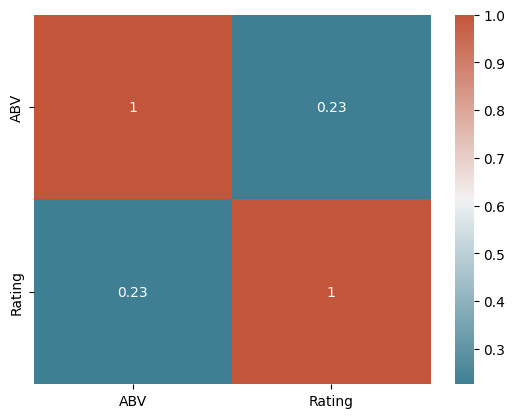

In [ ]:
corr1 = continuous_variable.corr()# plot the heatmap
sns.heatmap(corr1, xticklabels=corr1.columns, yticklabels=corr1.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Rating Feature

<Axes: title={'center': 'Frequency of Rating'}, xlabel='Rating', ylabel='Count'>

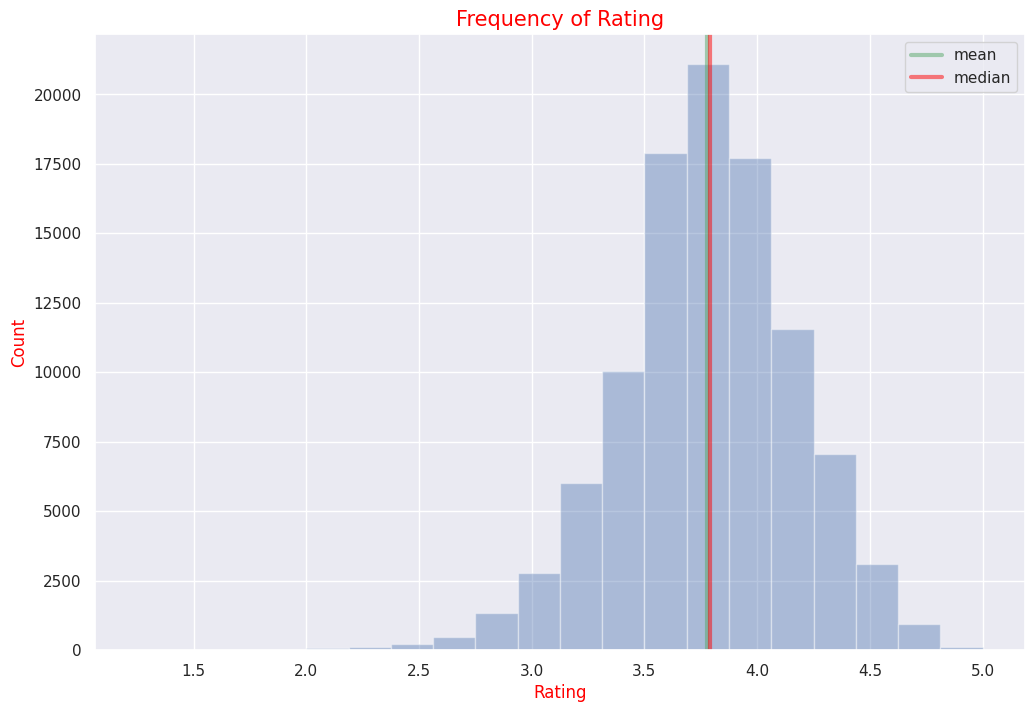

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
plt.rcParams['font.size'] = 15
plot_histogram(df, "Rating", bins=20)

In [ ]:
df['Rating'].describe()

count    100646.000000
mean          3.776965
std           0.389970
min           1.250000
25%           3.540000
50%           3.790000
75%           4.030000
max           5.000000
Name: Rating, dtype: float64

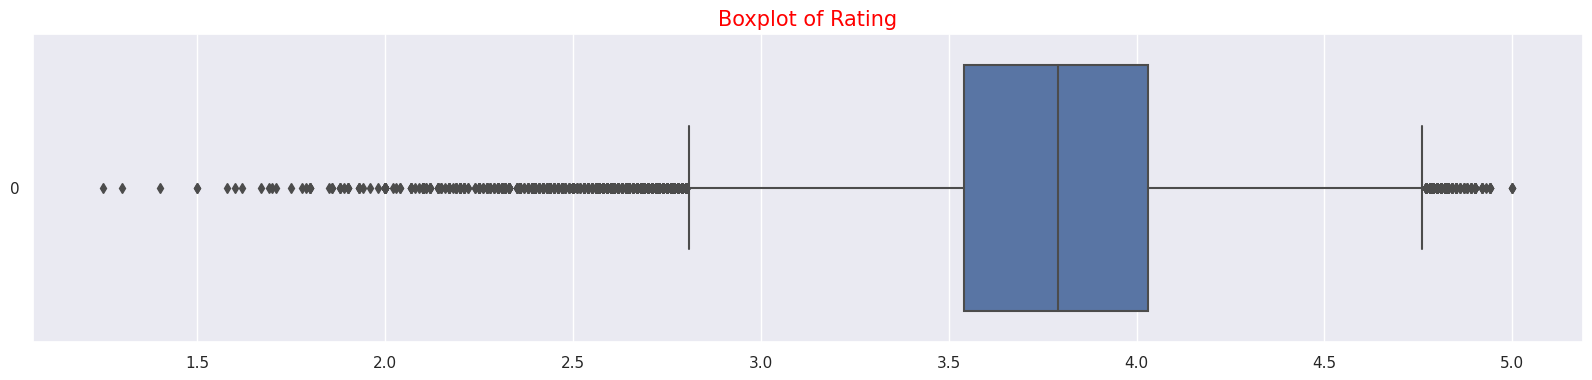

In [ ]:
sns.set(rc={'figure.figsize':(20,4)})
sns.boxplot(data=df['Rating'], orient='h')
plt.title('Boxplot of Rating', color = 'Red', fontsize = 15)
plt.show()

ABV Feature

In [ ]:
df['ABV'].describe()

count    100646.000000
mean         13.268421
std           1.472526
min           0.000000
25%          12.500000
50%          13.400000
75%          14.000000
max          50.000000
Name: ABV, dtype: float64

<Axes: title={'center': 'Frequency of ABV'}, xlabel='ABV', ylabel='Count'>

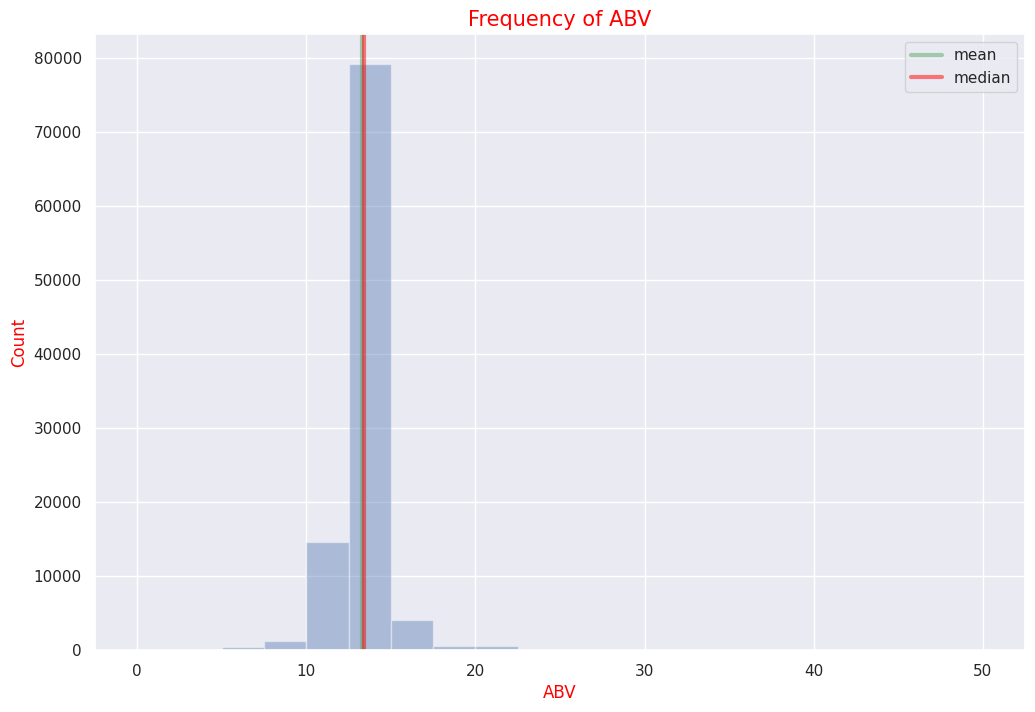

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
plt.rcParams['font.size'] = 15
plot_histogram(df, "ABV", bins=20)

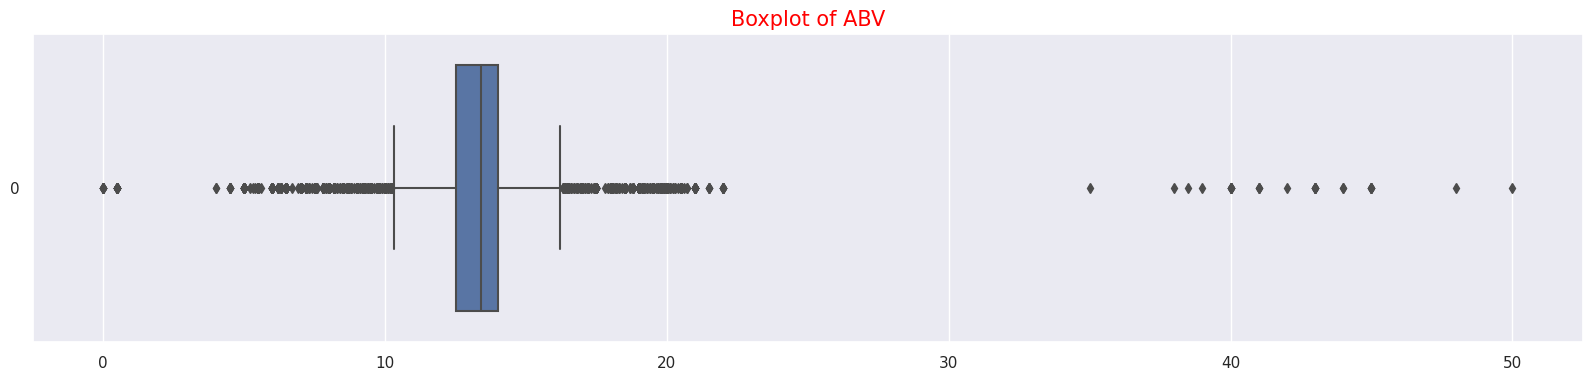

In [ ]:
sns.set(rc={'figure.figsize':(20,4)})
sns.boxplot(data=df['ABV'], orient='h')
plt.title('Boxplot of ABV', color = 'Red', fontsize = 15)
plt.show()

In [ ]:
# Remove outliers for 'ABV', and keep the data in the range of 2.5 to 25.0
df = df.drop(df[(df['ABV']<5)].index)
df = df.drop(df[(df['ABV']>25)].index)

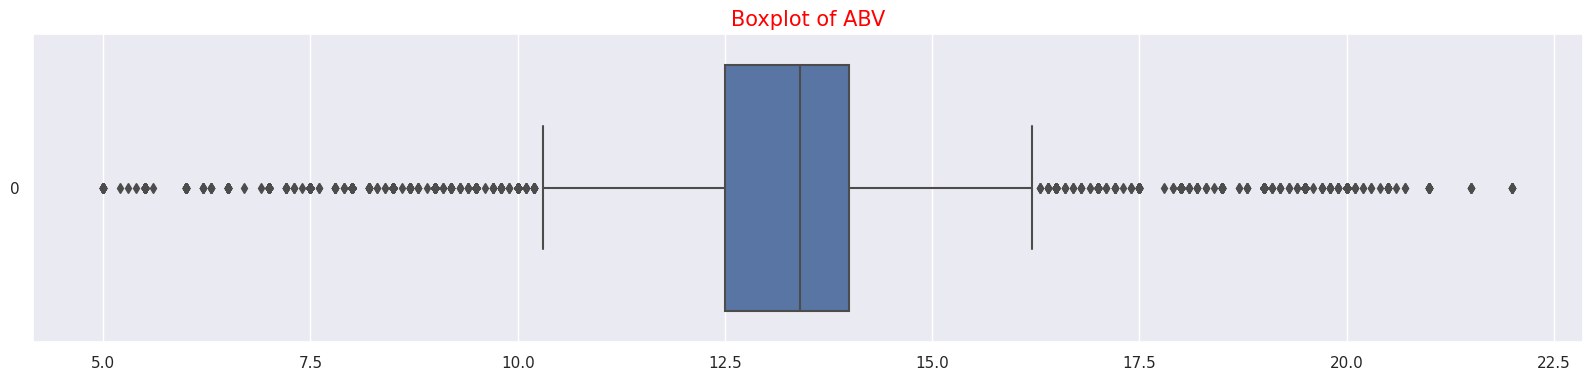

In [ ]:
sns.set(rc={'figure.figsize':(20,4)})
sns.boxplot(data=df['ABV'], orient = 'h')
plt.title('Boxplot of ABV', color = 'Red', fontsize = 15)
plt.show()

### *1*. Which features are most important for predicting 'Rating'

#### Find the correlation by visualizing through Heatmap

In [ ]:
df_cor = df.copy()

In [ ]:
s = (df_cor.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['WineName', 'Type', 'Elaborate', 'Grapes', 'Harmonize', 'Body', 'Acidity', 'Code', 'Country', 'RegionName', 'WineryName']


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
LE=LabelEncoder()
for i in object_cols:
    df_cor[i]=df_cor[[i]].apply(LE.fit_transform)

In [ ]:
correlation = df_cor.corr()['Rating'].abs().sort_values(ascending=False)
print("Correlation with target:\n", correlation)S

Correlation with target:
 Rating        1.000000
ABV           0.232746
Code          0.138391
Country       0.103815
Type          0.088167
Harmonize     0.078250
Body          0.076856
Elaborate     0.065165
RegionID      0.041701
Unnamed: 0    0.036090
WineID        0.036077
Acidity       0.025778
WineryID      0.024282
RegionName    0.023441
WineName      0.014662
WineryName    0.014249
Grapes        0.010241
Name: Rating, dtype: float64


Text(0.5, 1.0, 'Correlation between each feature with Rating')

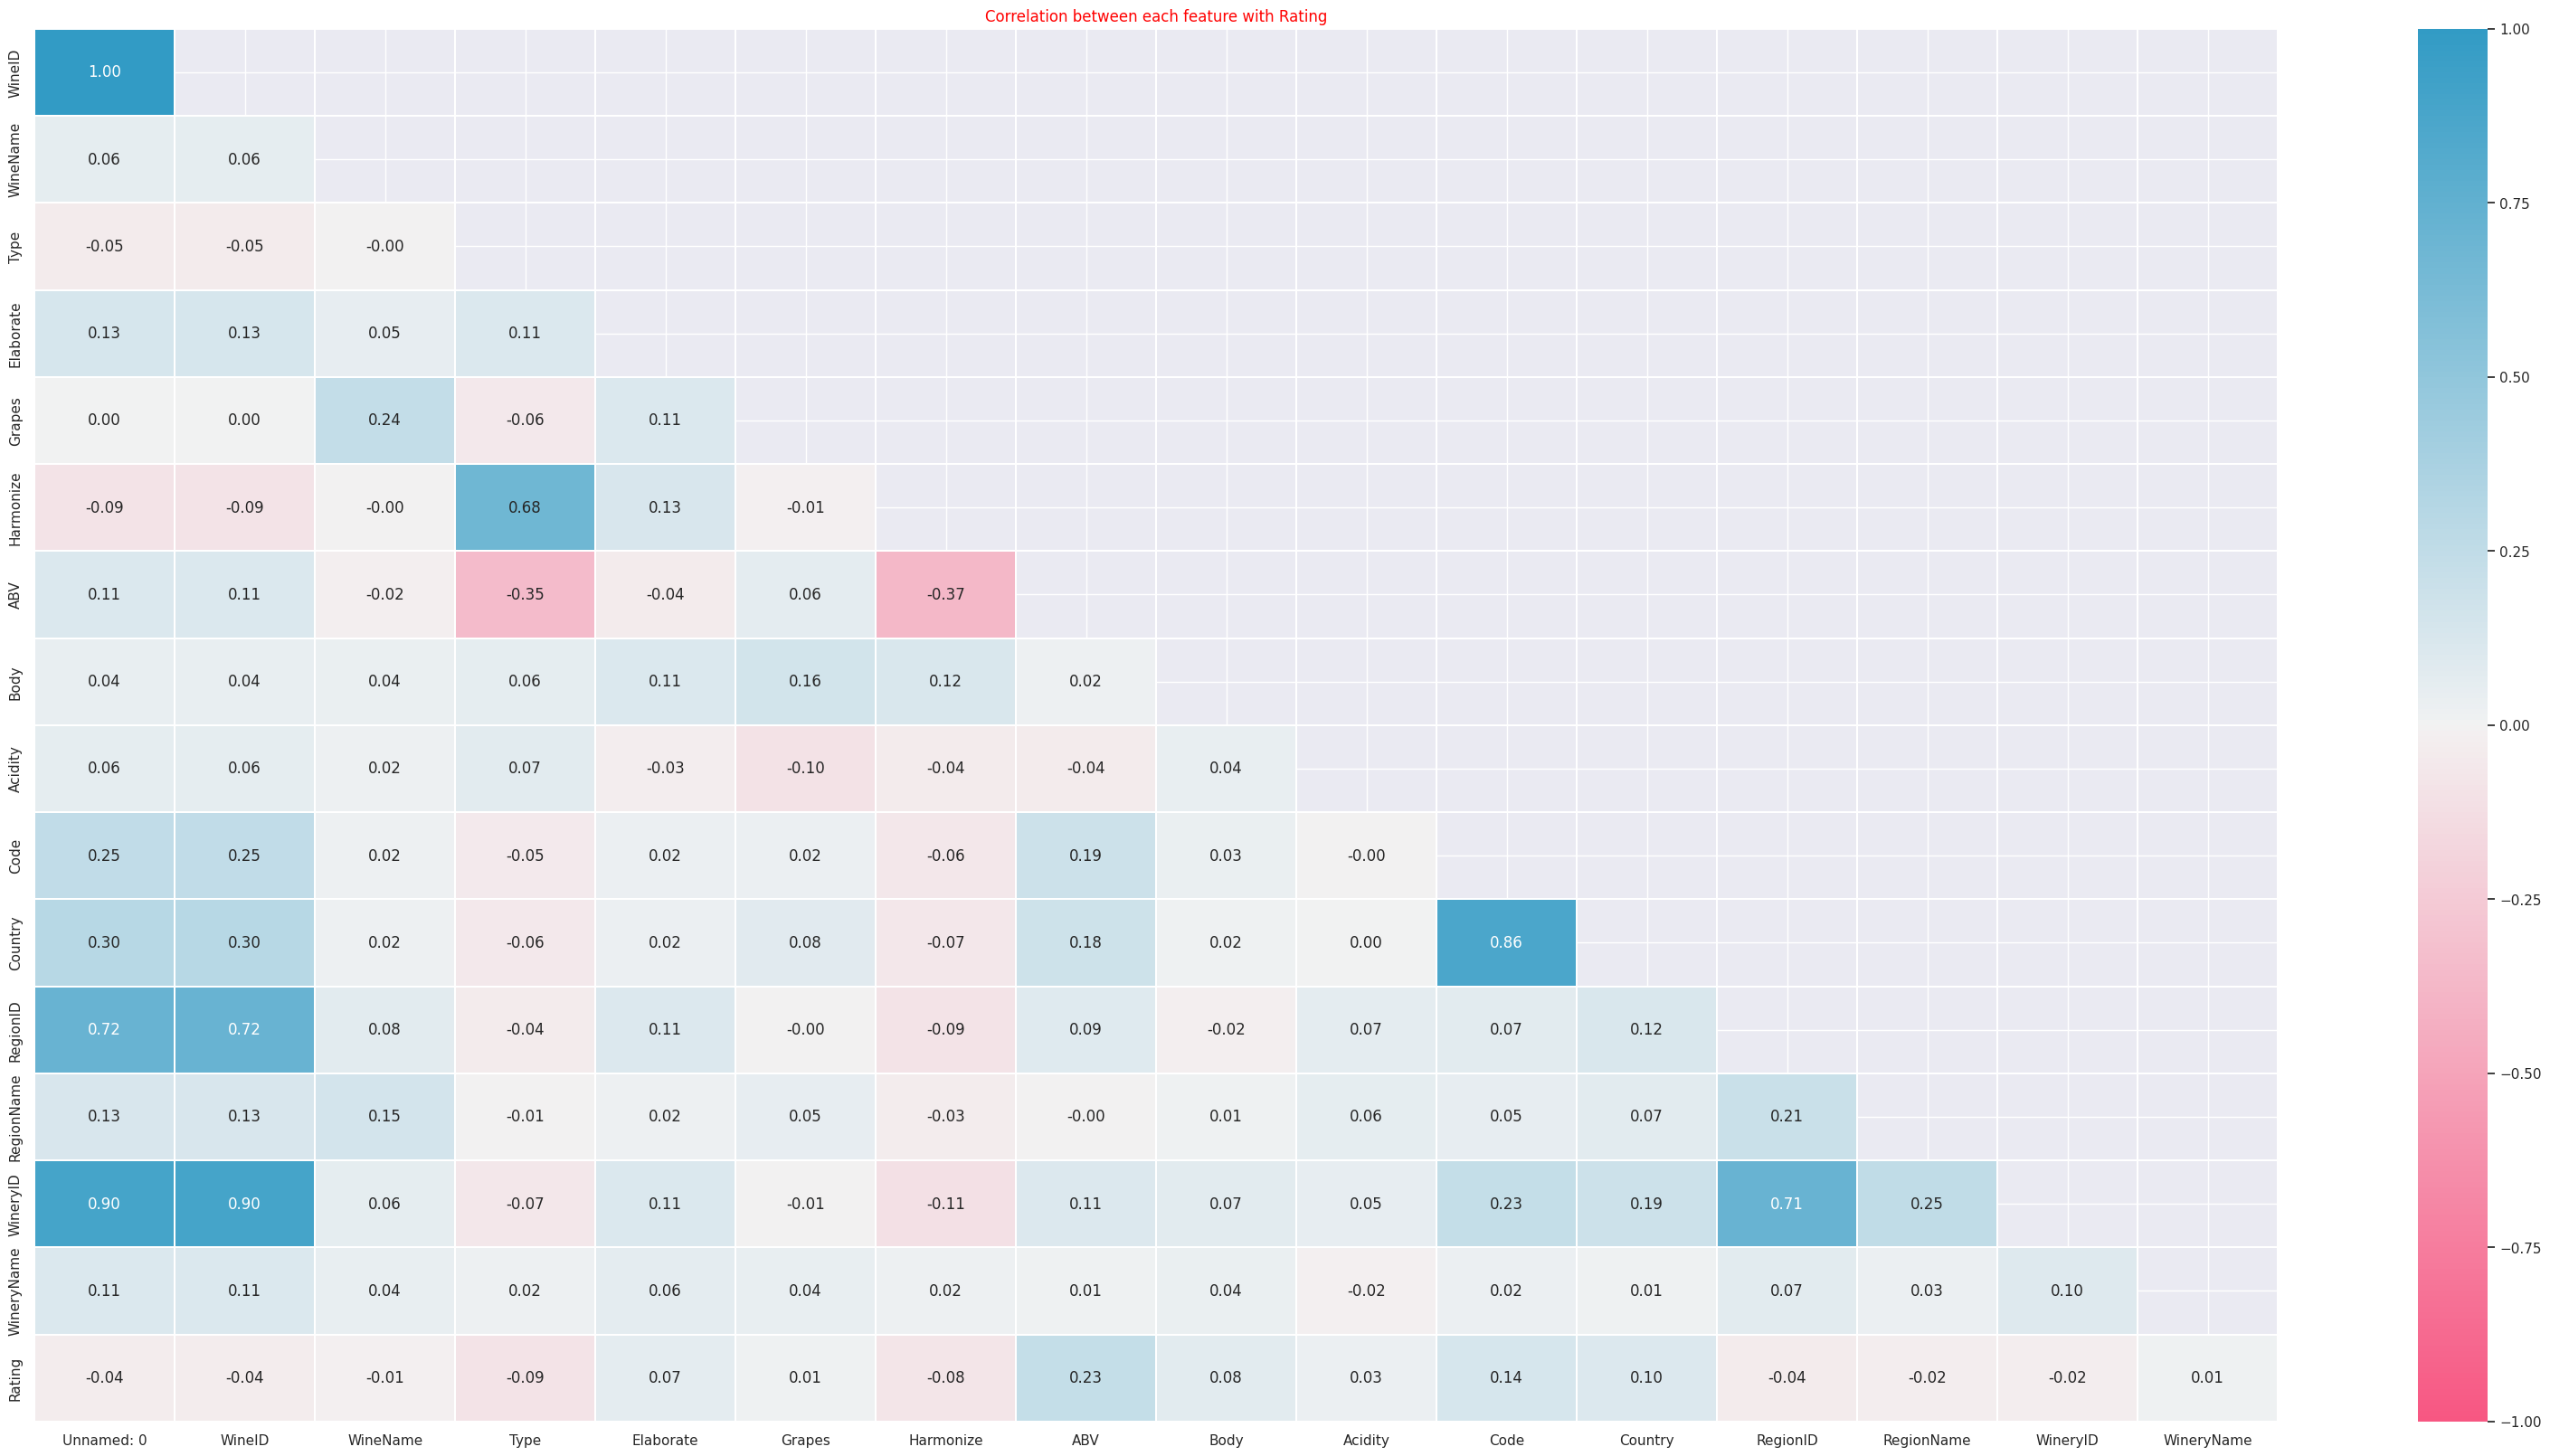

In [ ]:
# Print the correlation of each features with the target 'Rating':
dataset_corr = df_cor.corr()

# Print the lower triangular:
ones_corr = np.ones_like(dataset_corr, dtype = bool)

mask = np.triu(ones_corr)

## Drop the last row and the last columns in dataset_corr:
adjusted_mask = mask[1: , :-1]
adjusted_mask_dataset_corr = dataset_corr.iloc[1: , :-1]

fig, ax = plt.subplots(figsize = (40, 20))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap = True)
sns.heatmap(data = adjusted_mask_dataset_corr, mask = adjusted_mask,
            annot = True, fmt = '.2f',
            cmap = cmap,
            vmin = -1, vmax = 1,
            linecolor = 'white', linewidths = 0.1)
plt.title ('Correlation between each feature with Rating', fontsize = 12, color = 'Red')

Choose some features base on the default value ( >= 0.05 and <= -0.05).
There are 7 features:
1. ABV
2. Code
3. Country
4. Type
5. Harmonize
6. Body
7. Elaborate

#### Recheck by other solutions

##### Distribution plot

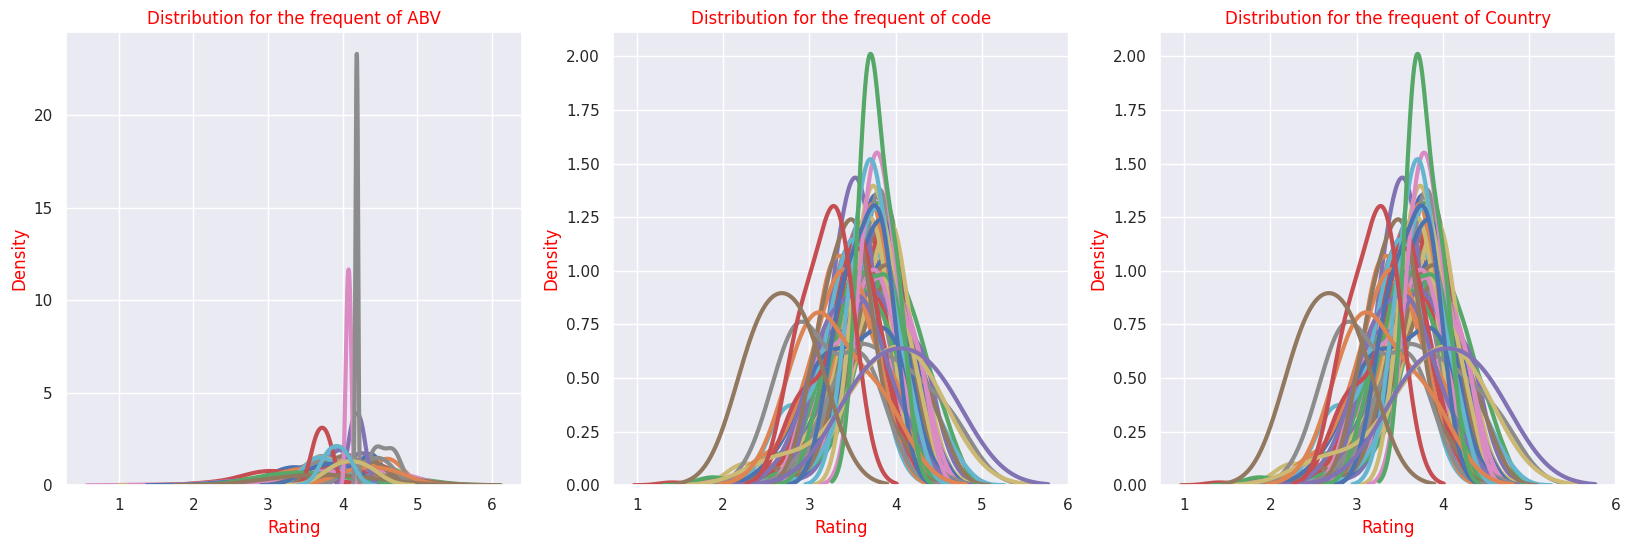

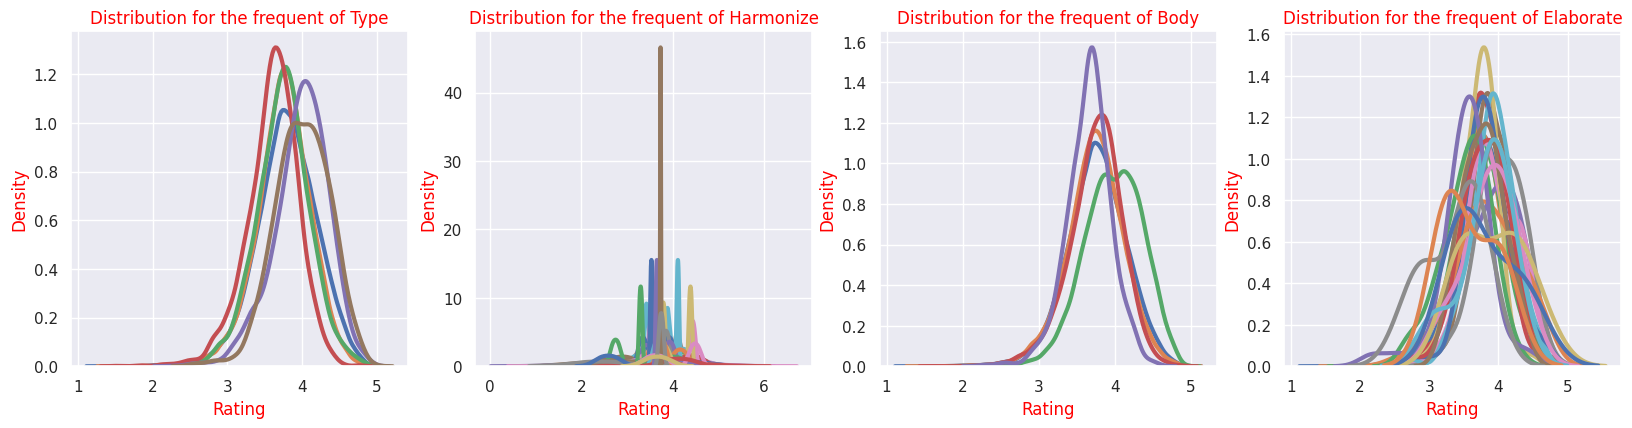

In [ ]:
fig = plt.figure(figsize = ([20,20]))
plt.subplot(3,3,1)
freq_ABV = df['ABV'].value_counts().index
plot_distribution(df, "Rating", freq_ABV, "ABV")
plt.title("Distribution for the frequent of ABV", color = 'Red')

plt.subplot(3,3,2)
freq_code = df['Code'].value_counts().index
plot_distribution(df, "Rating", freq_code, "Code")
plt.title("Distribution for the frequent of code", color = 'Red')

plt.subplot(3,3,3)
freq_country = df['Country'].value_counts().index
plot_distribution(df, "Rating", freq_country, "Country")
plt.title("Distribution for the frequent of Country", color = 'Red')

plt.show()

fig = plt.figure(figsize = ([20,20]))
plt.subplot(4,4,1)
freq_type = df['Type'].value_counts().index
plot_distribution(df, "Rating", freq_type, "Type")
plt.title("Distribution for the frequent of Type", color = 'Red')

plt.subplot(4,4,2)
freq_har = df['Harmonize'].value_counts().index
plot_distribution(df, "Rating", freq_har, "Harmonize")
plt.title("Distribution for the frequent of Harmonize", color = 'Red')

plt.subplot(4,4,3)
freq_body = df['Body'].value_counts().index
plot_distribution(df, "Rating", freq_body, "Body")
plt.title("Distribution for the frequent of Body", color = 'Red')

plt.subplot(4,4,4)
freq_ela = df['Elaborate'].value_counts().index
plot_distribution(df, "Rating", freq_ela, "Elaborate")
plt.title("Distribution for the frequent of Elaborate", color = 'Red')

plt.show()

##### Country

In [ ]:
countries = (df["Country"]
             .value_counts())

freq_countries = list(
    countries[
        countries.values > 5000]
    .index)

freq2_countries = list(
    countries[
        (countries.values <= 5000) &
        (countries.values >= 3000)]
    .index)

freq3_countries = list(
    countries[
        (countries.values <= 15) &
        (countries.values >= 10)]
    .index)

freq4_countries = list(
    countries[
        (countries.values < 10)]
    .index)

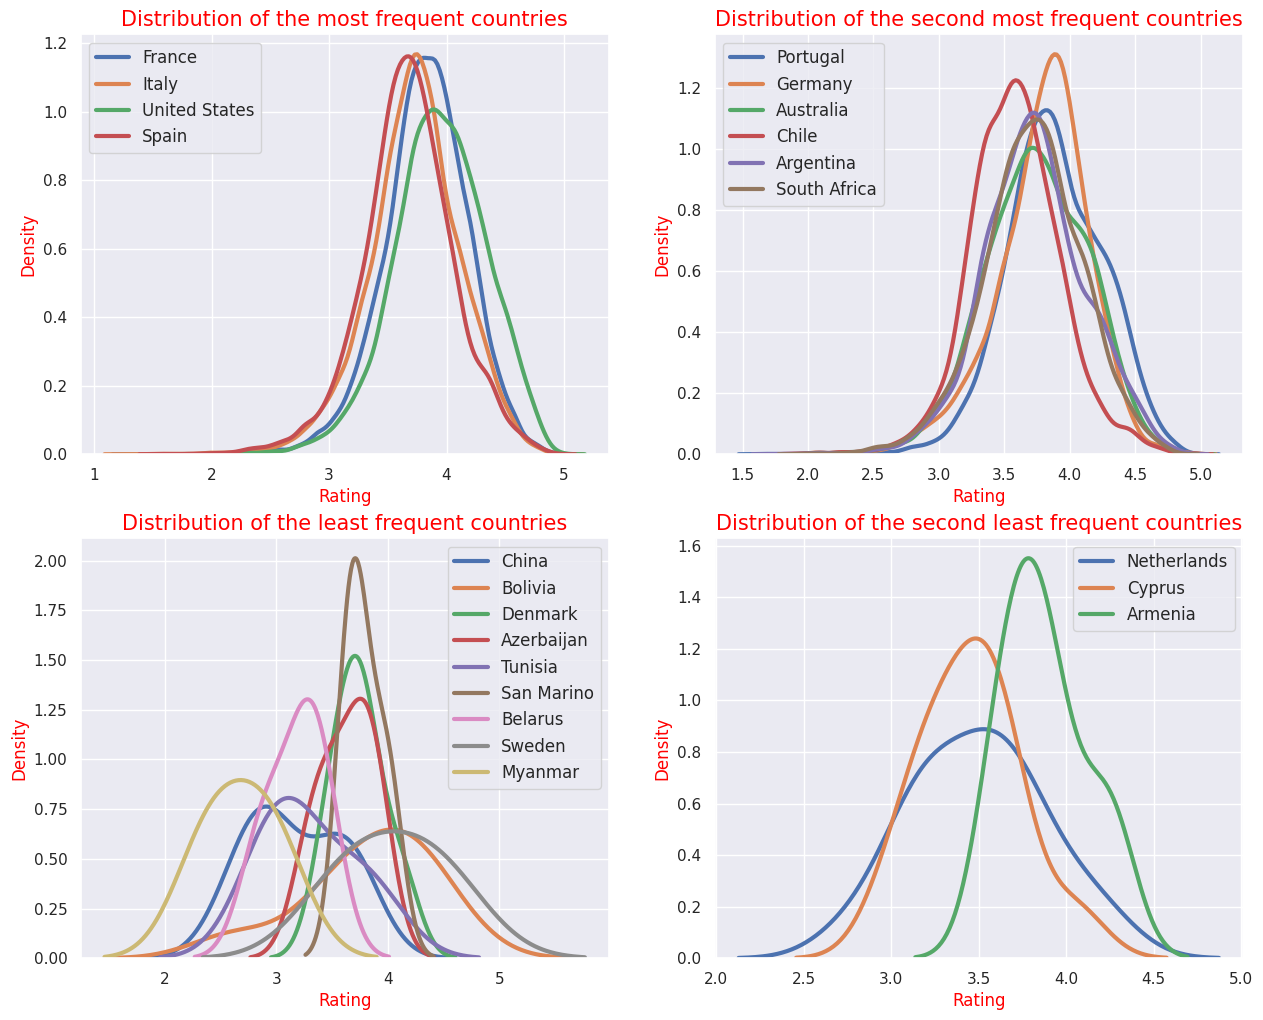

In [ ]:
# distribution of the rating per country
fig = plt.figure(figsize = ([15,12]))
plt.rcParams['font.size'] = 14

# plot rating distribution for most frequent countries
plt.subplot(2, 2, 1)
plot_distribution(df, "Rating",
                  freq_countries, "Country")
plt.title('Distribution of the most frequent countries', fontsize = 15, color = 'Red')
plt.legend(fontsize = 12)

# plot rating distribution for second most frequent countries
plt.subplot(2, 2, 2)
plot_distribution(df, "Rating",
                  freq2_countries, "Country")
plt.title('Distribution of the second most frequent countries', fontsize = 15, color = 'Red')
plt.legend(fontsize = 12)

# plot rating distribution for the least frequent countries
plt.subplot(2, 2, 3)
plot_distribution(df, "Rating",
                  freq4_countries, "Country")
plt.title('Distribution of the least frequent countries', color = 'Red', fontsize = 15)
plt.legend(fontsize = 12)

# plot rating distribution for second most frequent countries
plt.subplot(2, 2, 4)
plot_distribution(df, "Rating",
                  freq3_countries, "Country")
plt.title('Distribution of the second least frequent countries', color = 'Red', fontsize = 15)
plt.legend(fontsize = 12)

plt.show()

The feature 'Country' has the third largest correlation with Rating at 0.103, I choose the other way to see this feature through distribution plot.
1. I choose the most frequent countries, the second most frequent countries, the least frequent countries and the second least frequent countries, there are a lot of really strong / significant differentiations based on comparing variety of countries to rating.
2. So the feature 'Country' is a feature that important for predicting 'Rating'.
> Through 2 ways of rechecking, we can conclude that 'Country' is the important feature for predicting 'Rating'.






##### Code

In [ ]:
codes = (df["Code"]
             .value_counts())

freq_codes = list(
    codes[
        codes.values > 5000]
    .index)

freq2_codes = list(
    codes[
        (codes.values <= 5000) &
        (codes.values >= 3000)]
    .index)

freq3_codes = list(
    codes[
        (codes.values <= 15) &
        (codes.values >= 10)]
    .index)

freq4_codes = list(
    codes[
        (codes.values < 10)]
    .index)


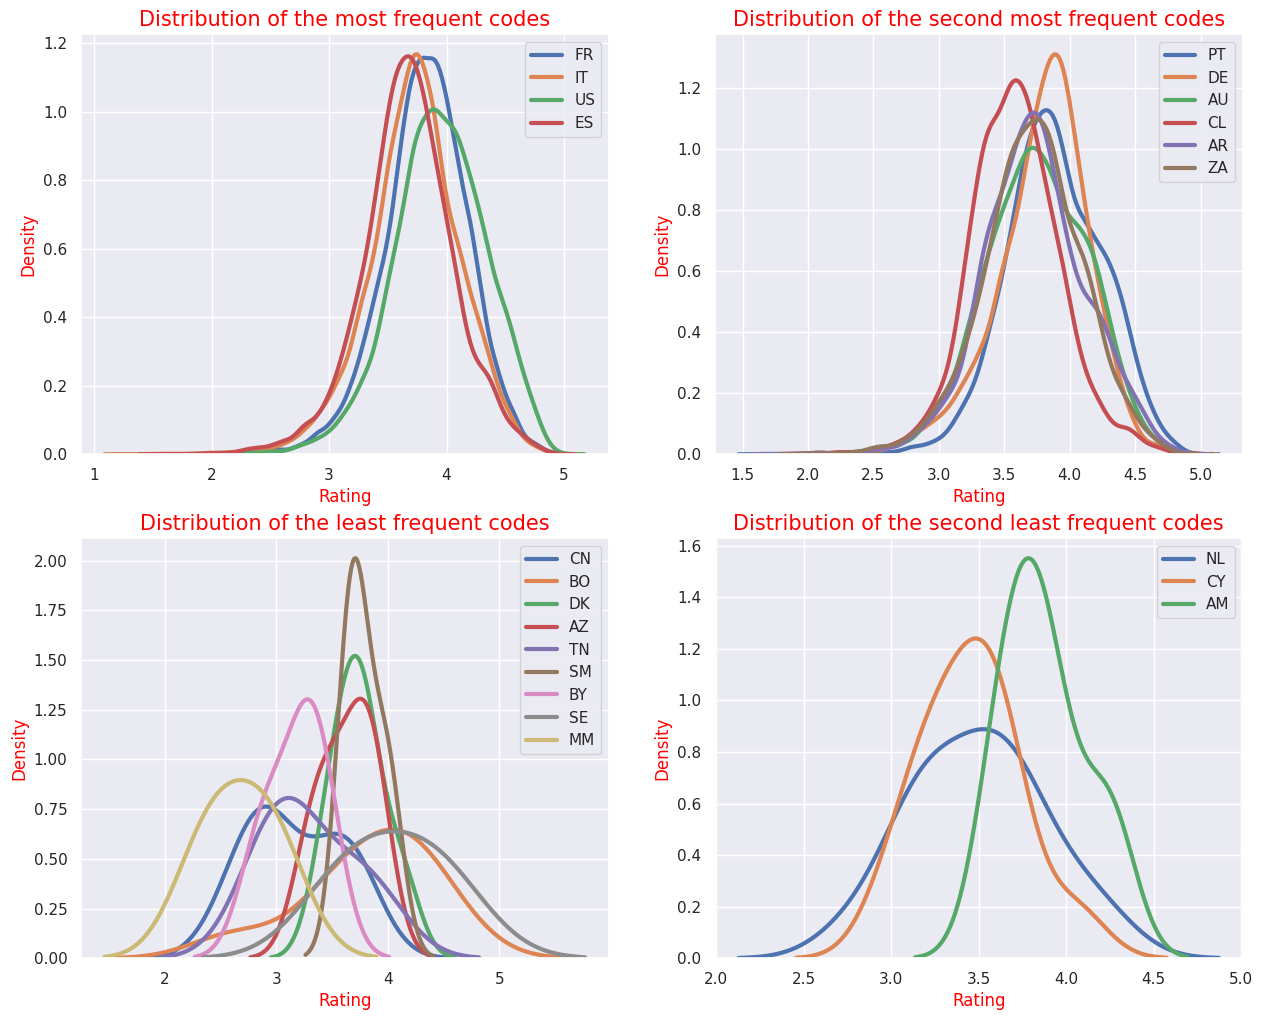

In [ ]:
# distribution of the rating per code
fig = plt.figure(figsize = ([15,12]))
plt.rcParams['font.size'] = 14

# plot rating distribution for most frequent codes
plt.subplot(2, 2, 1)
plot_distribution(df, "Rating",
                  freq_codes, "Code")
plt.title('Distribution of the most frequent codes', fontsize = 15, color = 'Red')
plt.legend()

# plot rating distribution for second most frequent codes
plt.subplot(2, 2, 2)
plot_distribution(df, "Rating",
                  freq2_codes, "Code")
plt.title('Distribution of the second most frequent codes', fontsize = 15, color = 'Red')
plt.legend()

# plot rating distribution for the least frequent codes
plt.subplot(2, 2, 3)
plot_distribution(df, "Rating",
                  freq4_codes, "Code")
plt.title('Distribution of the least frequent codes', color = 'Red', fontsize = 15)
plt.legend()


# plot rating distribution for second least frequent codes
plt.subplot(2, 2, 4)
plot_distribution(df, "Rating",
                  freq3_codes, "Code")
plt.title('Distribution of the second least frequent codes', color = 'Red', fontsize = 15)
plt.legend()

plt.show()

Through the charts, we can see that the distribution of each code is a significant difference with the others. So the code is the feature that most important for predicting 'Rating'.

1. There are big differences between each frequency of each code with the bin of Rating.
2. With a big difference, so the feature 'Code' is the important feature for predicting 'Rating'.

##### Harmonize

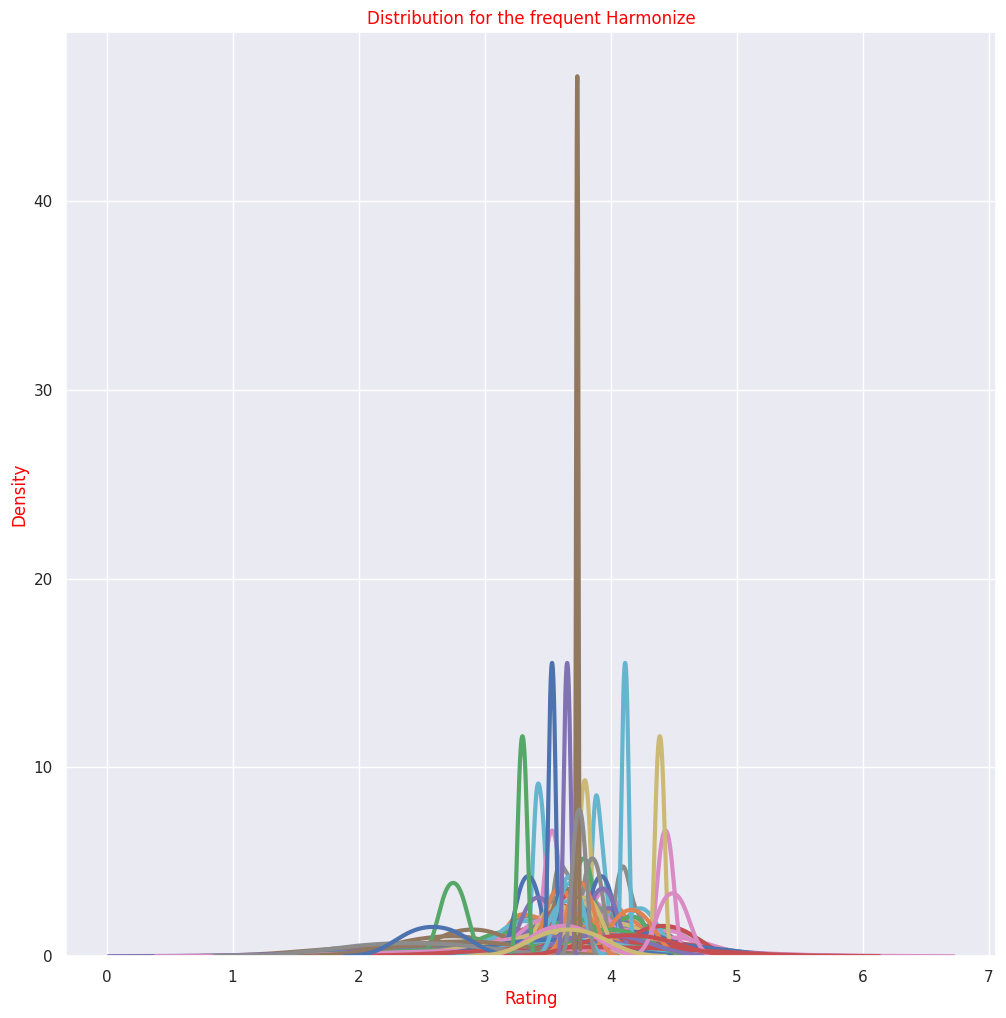

In [ ]:
fig = plt.figure(figsize = ([12,12]))

freq_har = df['Harmonize'].value_counts().index
plot_distribution(df, "Rating", freq_har, "Harmonize")
plt.title("Distribution for the frequent Harmonize", color = 'Red')

plt.show()

In [ ]:
har = (df["Harmonize"]
             .value_counts())

freq_har = list(
    har[
        har.values > 4500]
    .index)

freq2_har = list(
    har[
        (har.values <= 4500) &
        (har.values >= 3000)]
    .index)

freq3_har = list(
    har[
        (har.values <= 4) &
        (har.values >= 3)]
    .index)

freq4_har = list(
    har[
        (har.values < 3)]
    .index)


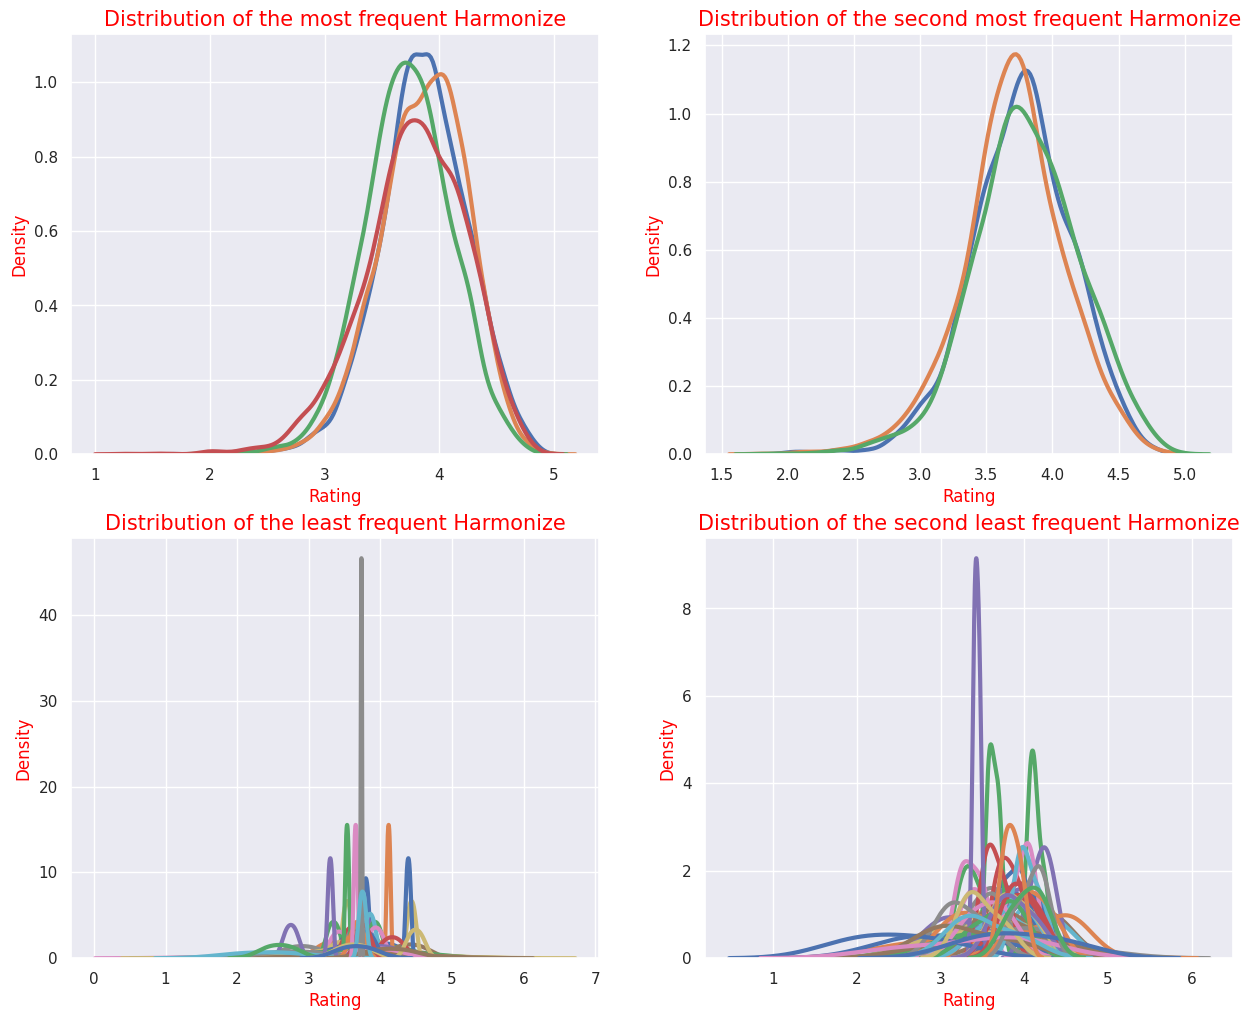

In [ ]:
# distribution of the rating per Harmonize
fig = plt.figure(figsize = ([15,12]))
plt.rcParams['font.size'] = 14

# plot rating distribution for most frequent Harmonize
plt.subplot(2, 2, 1)
plot_distribution(df, "Rating",
                  freq_har, "Harmonize")
plt.title('Distribution of the most frequent Harmonize', fontsize = 15, color = 'Red')

# plot rating distribution for second most frequent Harmonize
plt.subplot(2, 2, 2)
plot_distribution(df, "Rating",
                  freq2_har, "Harmonize")
plt.title('Distribution of the second most frequent Harmonize', fontsize = 15, color = 'Red')

# plot rating distribution for the least frequent Harmonize
plt.subplot(2, 2, 3)
plot_distribution(df, "Rating",
                  freq4_har, "Harmonize")
plt.title('Distribution of the least frequent Harmonize', color = 'Red', fontsize = 15)


# plot rating distribution for second least frequent Harmonize
plt.subplot(2, 2, 4)
plot_distribution(df, "Rating",
                  freq3_har, "Harmonize")
plt.title('Distribution of the second least frequent Harmonize', color = 'Red', fontsize = 15)

plt.show()

Harmonize is the feature that contains the main dishes set that pair with the wine item. These are provided by producers but openly recommended on the internet by sommeliers and even consumers;
Through the result, I divide it into 4 parts:
1. The most frequency Harmonize
2. The second frequency Harmonize
3. The least frequency Harmonize
4. The second least frequency Harmonize
> The result is kind of difference with some variances are different with the others, but not significant >> try to detect the outliers but there is no outliers through the result of boxplot.
> Through the distribution plot, there is a weak/ a little different in the distribution shapes, so 'Harmonize' is not the important feature for predicting Target.



* Through the result, although the correlation between 'Harmonize' and 'Rating' is |-0.08|, but there is a little different in the frequency on each bins.

* The feature 'Harmonize' is not the important feature for predicting.

* There are 893 unique values in the 'Harmonize' feature, there are a variety range of dishes which are provided by producers but openly recommended on the internet by sommeliers and even consumers. Hence, in some circumstances, it is highly recommended due to the quality of these comments.

##### ABV

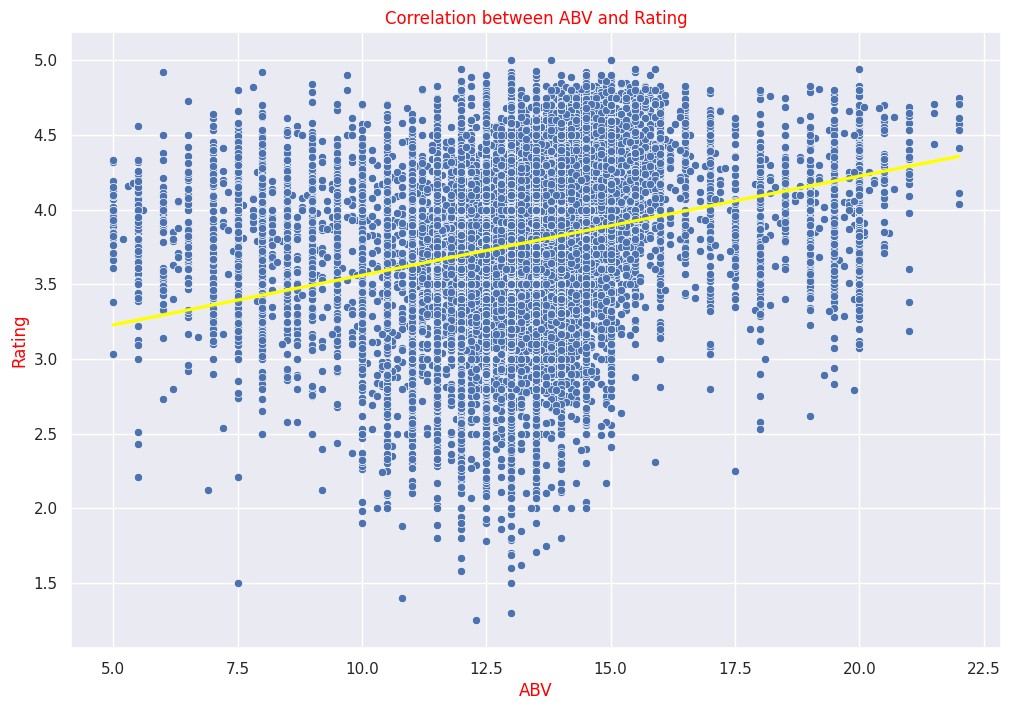

In [ ]:
fig = plt.figure(figsize = ([12,8]))
sns.scatterplot(x = 'ABV', y = 'Rating', data = df)
sns.regplot(data=df, x='ABV', y='Rating', scatter=False, color = 'yellow')
plt.xlabel('ABV', fontsize = 12, color = 'Red')
plt.ylabel('Rating', fontsize = 12, color = 'Red')
plt.title('Correlation between ABV and Rating', fontsize = 12, color = 'Red')
plt.show()

* Through the correlation by visualizing through heatmap, the correlation between ABV and Rating is 0.23.
* Through the first solution (visualizing through scatter plot), we can see the positive correlation between 'ABV' and 'Rating'.
> Hence, we can conclude that 'ABV' is the important feature that can predict the target 'Rating'.

##### Type

Solution 1

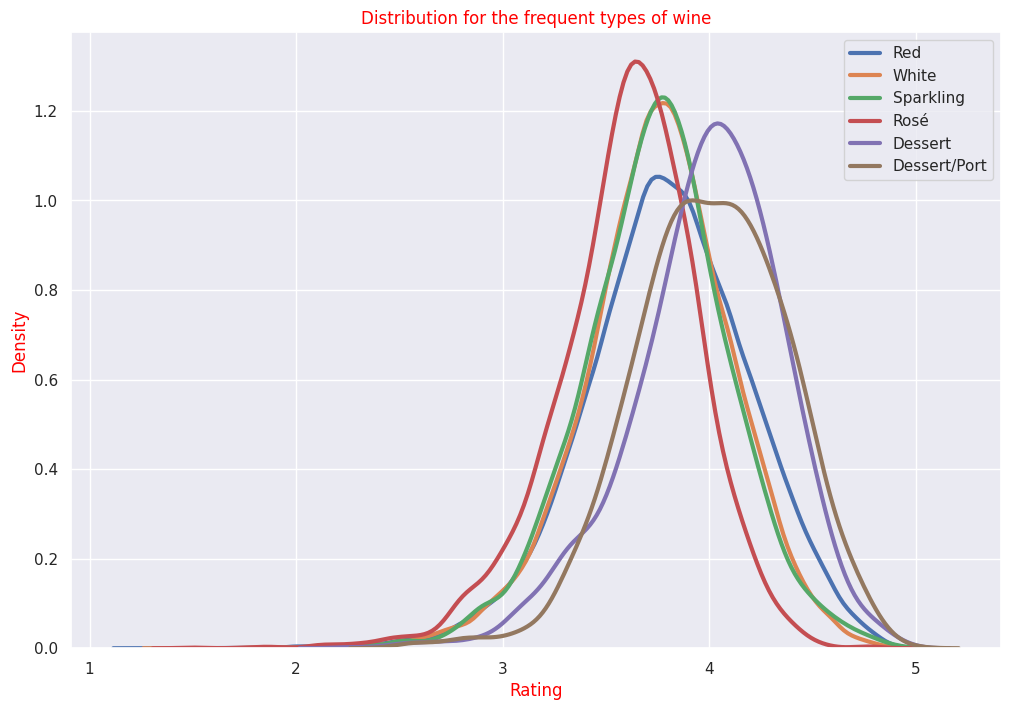

In [ ]:
fig = plt.figure(figsize = ([12,8]))
freq_type = df['Type'].value_counts().index
plot_distribution(df, "Rating", freq_type, "Type")
plt.title("Distribution for the frequent types of wine", color = 'Red')
plt.legend()

plt.show()

There are not significant differences between each distribution shape of 'Type'.
> 'Type' is not the most important feature for predicting 'Rating'.




##### Body

In [ ]:
df.Body.value_counts()

Full-bodied          43852
Medium-bodied        34376
Very full-bodied     10873
Light-bodied         10026
Very light-bodied     1454
Name: Body, dtype: int64

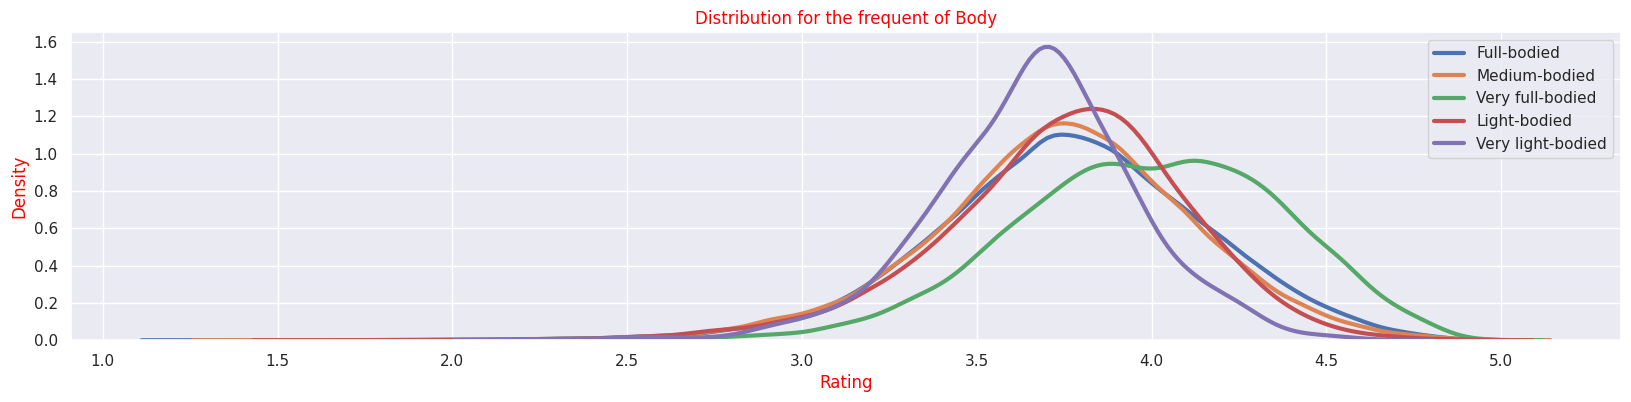

In [ ]:
freq_body = df['Body'].value_counts().index
plot_distribution(df, "Rating", freq_body, "Body")
plt.title("Distribution for the frequent of Body", color = 'Red')
plt.legend()

Body is the categorical body classification: Very light-bodied, light-bodied, medium-bodied, full-bodied or very full-bodied based on wine viscosity.
* Through heatmap, the correlation between 'Body' and 'Rating' is 0.08.
* Through the distribution plot, there are not distinctive at all in different shapes.
> Hence, we can conclude that the 'Body' is not an important feature for predicting 'Rating'.


##### Elaborate

In [ ]:
df.Elaborate.value_counts()

Varietal/100%                        72449
Assemblage/Blend                     19239
Assemblage/Bordeaux Red Blend         4374
Assemblage/Rhône Red Blend            1254
Assemblage/Valpolicella Red Blend      803
Assemblage/Champagne Blend             699
Assemblage/Portuguese Red Blend        562
Assemblage/Port Blend                  442
Assemblage/Provence Rosé Blend         258
Assemblage/Meritage Red Blend          104
Assemblage/Portuguese White Blend       78
Varietal/>75%                           68
Assemblage/Bourgogne Red Blend          67
Assemblage/Rioja Red Blend              60
Assemblage/Cava Blend                   42
Assemblage/Tuscan Red Blend             26
Assemblage/Priorat Red Blend            15
Assemblage/Soave White Blend            14
Assemblage/Chianti Red Blend            11
Assemblage/Meritage White Blend          6
Assemblage/Rioja White Blend             5
Assemblage/Bourgogne White Blend         5
Name: Elaborate, dtype: int64

In [ ]:
ela = (df["Elaborate"]
             .value_counts())

freq_ela = list(
    ela[
        ela.values >= 1000]
    .index)

freq2_ela = list(
    ela[
        (ela.values < 1000) &
        (ela.values >= 100)]
    .index)

freq3_ela = list(
    ela[
        (ela.values <= 50) &
        (ela.values >= 10)]
    .index)

freq4_ela = list(
    ela[
        (ela.values < 10)]
    .index)


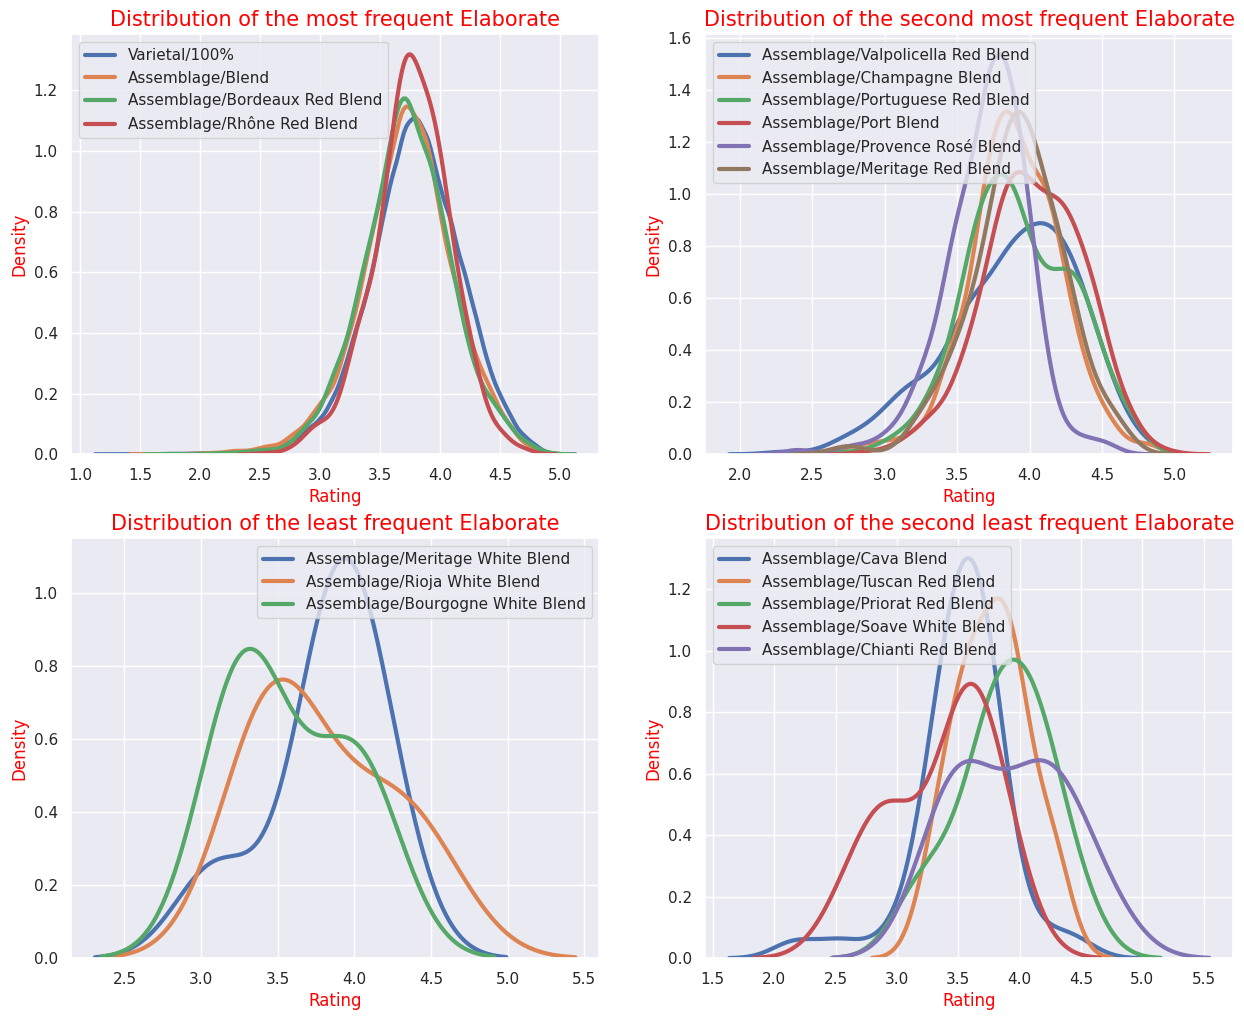

In [ ]:
# distribution of the rating per Elaborate
fig = plt.figure(figsize = ([15,12]))
plt.rcParams['font.size'] = 14

# Distribution for most frequent Elaborate
plt.subplot(2, 2, 1)
plot_distribution(df, "Rating",
                  freq_ela, "Elaborate")
plt.title('Distribution of the most frequent Elaborate', fontsize = 15, color = 'Red')
plt.legend()

# Distribution for second most frequent Elaborate
plt.subplot(2, 2, 2)
plot_distribution(df, "Rating",
                  freq2_ela, "Elaborate")
plt.title('Distribution of the second most frequent Elaborate', fontsize = 15, color = 'Red')
plt.legend()

# Distribution for the least frequent Elaborate
plt.subplot(2, 2, 3)
plot_distribution(df, "Rating",
                  freq4_ela, "Elaborate")
plt.title('Distribution of the least frequent Elaborate', color = 'Red', fontsize = 15)
plt.legend()

# Distribution for second least frequent Elaborate
plt.subplot(2, 2, 4)
plot_distribution(df, "Rating",
                  freq3_ela, "Elaborate")
plt.title('Distribution of the second least frequent Elaborate', color = 'Red', fontsize = 15)
plt.legend()

plt.show()

Through the charts, we can see that the shapes of distribution are significant differences in 4 charts.

In this solution, we can see that in the rating of < 2 (< 1 and from 1-2), there are same at 0, some variances are different. But the frequency see the significant different in the last 3 bins (2-3, 3-4, 4-5) and has no rules about that.

> Hence, 'Elaborate' is the important feature for predicting.

#### Conclusion

Through the recheck step, we can conclude that the 'Harmonize', 'Type', 'Body' features are not important for predicting 'Rating' while the reverse is true for that of others.

###*2.* The highest percentage of highly rated wines (top 5 regions)

In [ ]:
df['RegionName'].value_counts()

Mendoza              2404
Bourgogne            2181
California           1831
Champagne            1794
Napa Valley          1736
                     ... 
Mount Gambier           1
Manjimup                1
Southern Fieurieu       1
Currency Creek          1
Plovdiv                 1
Name: RegionName, Length: 2158, dtype: int64

In [ ]:
df['Rating'].describe()

count    100581.000000
mean          3.777013
std           0.389700
min           1.250000
25%           3.540000
50%           3.790000
75%           4.030000
max           5.000000
Name: Rating, dtype: float64

In [ ]:
region_rating_counts = df[df['Rating'] >= 4.03].groupby('RegionName')['Rating'].count() # Count the time that the Region meet the conditions.
total_highly_rated_counts = df[df['Rating'] >= 4.03]['Rating'].count()                  # Count the total times.
top_regions_percentage = region_rating_counts / total_highly_rated_counts

top_regions_percentage = pd.DataFrame({'RegionName': top_regions_percentage.index,
                                       'Percentage': top_regions_percentage.values})

print(top_regions_percentage)

               RegionName  Percentage
0                  Aargau    0.000039
1                 Abruzzo    0.001897
2                  Achaia    0.000194
3               Aconcagua    0.000387
4         Aconcagua Costa    0.000077
...                   ...         ...
1484            Zacatecas    0.000039
1485                  Zug    0.000039
1486               Zürich    0.000194
1487              d Minis    0.000039
1488  Échezeaux Grand Cru    0.000039

[1489 rows x 2 columns]


In [ ]:
top_5_regions = top_regions_percentage.nlargest(5, 'Percentage')

print("Top 5 regions with the highest percentage of highly rated wines:\n", top_5_regions)

Top 5 regions with the highest percentage of highly rated wines:
       RegionName  Percentage
870  Napa Valley    0.046299
172    Bourgogne    0.033369
281    Champagne    0.029343
459        Douro    0.022724
755      Mendoza    0.018427


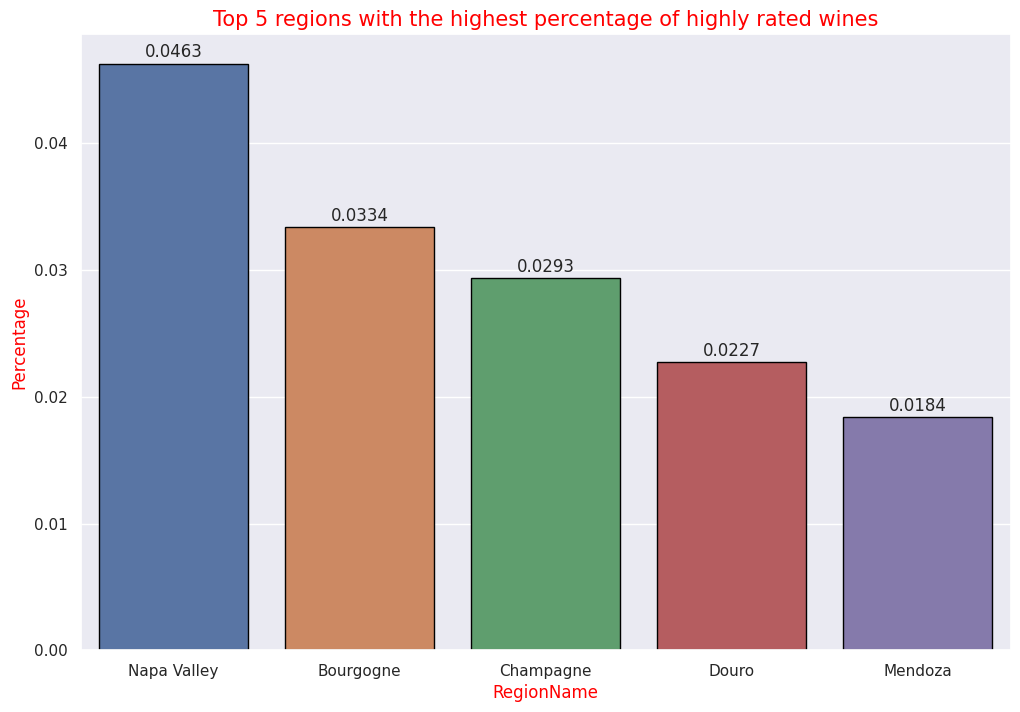

In [ ]:
fig = plt.figure(figsize = ([12, 8]))
sns.barplot(x = 'RegionName', y = 'Percentage', data = top_5_regions, edgecolor = 'black')
plt.title('Top 5 regions with the highest percentage of highly rated wines', color = 'Red', fontsize = 15)
plt.xlabel('RegionName', color = 'Red', fontsize = 12)
plt.ylabel('Percentage', color = 'Red', fontsize = 12)

for i, v in enumerate(top_5_regions.Percentage): #i: index/x, v: value/y ==> write the percentage in the top-center of the bar chart
  plt.text(i, v+0.0005, str(round(v,4)), ha = 'center', fontsize = 12)

plt.show()

###*3.* The highest percentage of highly rated wines (top 5 Countries)

In [ ]:
df['Country'].value_counts()

France           24366
Italy            19326
United States    13128
Spain             7105
Portugal          4957
                 ...  
Liechtenstein        1
Thailand             1
Albania              1
Jordan               1
Colombia             1
Name: Country, Length: 62, dtype: int64

Choose the threshold of highly rated wined is rating >= 4.03

In [ ]:
country_rating_counts = df[df['Rating'] >= 4.03].groupby('Country')['Rating'].count() # Count the time that the Country meet the conditions.
country_highly_rated_counts = df[df['Rating'] >= 4.03]['Rating'].count()              # Count the total times.
top_countries_percentage = country_rating_counts / country_highly_rated_counts

top_5_countries = pd.DataFrame({'Country': top_countries_percentage.index, 'Percentage': top_countries_percentage.values})

top_5_countries

,Country,Percentage
0,Albania,0.000039
1,Argentina,0.030040
2,Armenia,0.000077
3,Australia,0.047499
4,Austria,0.016220
5,Belgium,0.000077
6,Bolivia,0.000155
7,Brazil,0.006426
8,Bulgaria,0.001084
9,Canada,0.008633


In [ ]:
top_5_countries = top_5_countries.nlargest(5, 'Percentage')

print("Top 5 countries with the highest percentage of highly rated wines:")
print(top_5_countries)

Top 5 countries with the highest percentage of highly rated wines:
          Country  Percentage
15         France    0.270401
46  United States    0.214347
21          Italy    0.159995
33       Portugal    0.066120
3       Australia    0.047499


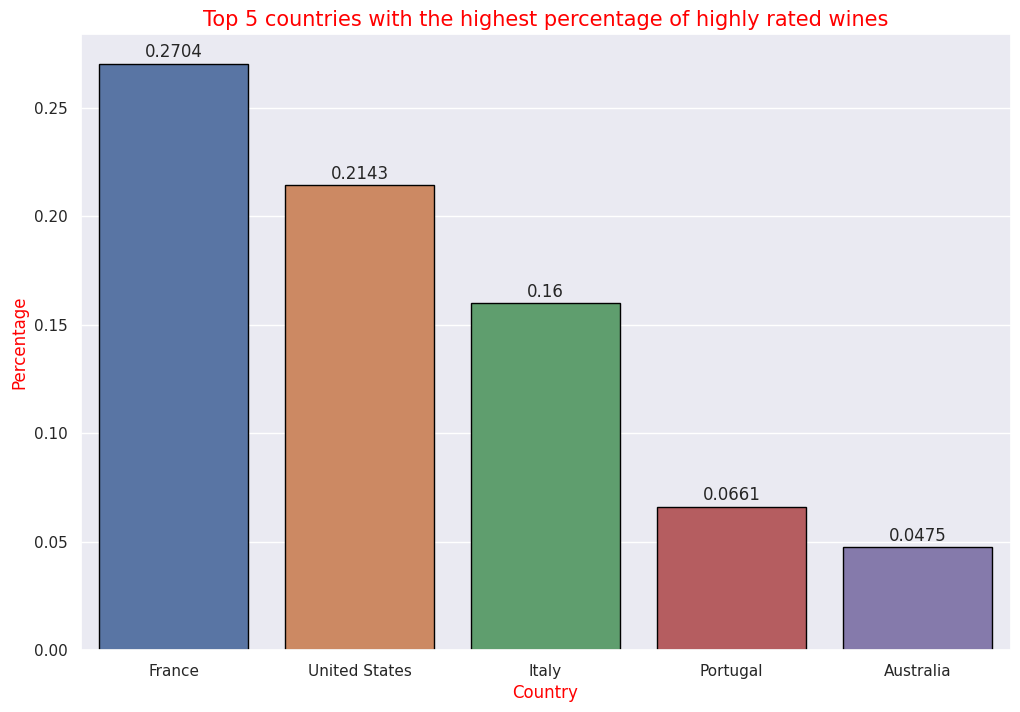

In [ ]:
fig = plt.figure(figsize = ([12, 8]))
sns.barplot(x = 'Country', y = 'Percentage', data = top_5_countries, edgecolor = 'black')
plt.title('Top 5 countries with the highest percentage of highly rated wines', color = 'Red', fontsize = 15)
plt.xlabel('Country', color = 'Red', fontsize = 12)
plt.ylabel('Percentage', color = 'Red', fontsize = 12)

for i, v in enumerate(top_5_countries.Percentage): #i: index/x, v: value/y ==> write the percentage in the top-center of the bar chart
  plt.text(i, v+0.003, str(round(v,4)), ha = 'center', fontsize = 12)

plt.show()

###*4.* Do ‘Type’ and ‘Grapes’ have significance with ‘Rating’?

In [ ]:
df['Type'].value_counts()

Red             56156
White           29189
Sparkling        7355
Rosé             4396
Dessert          2373
Dessert/Port     1112
Name: Type, dtype: int64

In [ ]:
df['Grapes'].value_counts()

['Chardonnay']                                                8694
['Pinot Noir']                                                7891
['Cabernet Sauvignon']                                        5530
['Syrah/Shiraz']                                              3863
['Riesling']                                                  3638
                                                              ... 
['Petit Verdot', 'Cabernet Sauvignon', 'Cabernet Franc']         1
['Sangiovese', 'Primitivo', 'Negroamaro']                        1
['Primitivo', 'Negroamaro', 'Merlot', 'Malvasia']                1
['Rondinella', 'Corvinone', 'Negrara Veronese', 'Corvina']       1
['Cabernet Sauvignon', 'Zweigelt', 'St. Laurent']                1
Name: Grapes, Length: 7101, dtype: int64

#### Grapes VS Rating

In [ ]:
df.Grapes.value_counts()

['Chardonnay']                                                8694
['Pinot Noir']                                                7891
['Cabernet Sauvignon']                                        5530
['Syrah/Shiraz']                                              3863
['Riesling']                                                  3638
                                                              ... 
['Petit Verdot', 'Cabernet Sauvignon', 'Cabernet Franc']         1
['Sangiovese', 'Primitivo', 'Negroamaro']                        1
['Primitivo', 'Negroamaro', 'Merlot', 'Malvasia']                1
['Rondinella', 'Corvinone', 'Negrara Veronese', 'Corvina']       1
['Cabernet Sauvignon', 'Zweigelt', 'St. Laurent']                1
Name: Grapes, Length: 7101, dtype: int64

Kruskal-Wallis
1. The Kruskal-Wallis test is a non-parametric alternative to the one-way ANOVA.
2. Not required to have a normal distribution in each group.

In [ ]:
from scipy.stats import kruskal

grouped_data = [group['Rating'] for name, group in df_cor.groupby('Grapes')]

h_statistic, p_value = kruskal(*grouped_data)

print("H-statistic:", h_statistic)
print("P-value:", p_value)


H-statistic: 17918.085595703178
P-value: 0.0


There is a high score of H-statistic and a extremely small of P-value which show significantly large differences between each group.
> 'Grapes' has significance with 'Rating'.

#### Type VS Rating


Compare by visualization

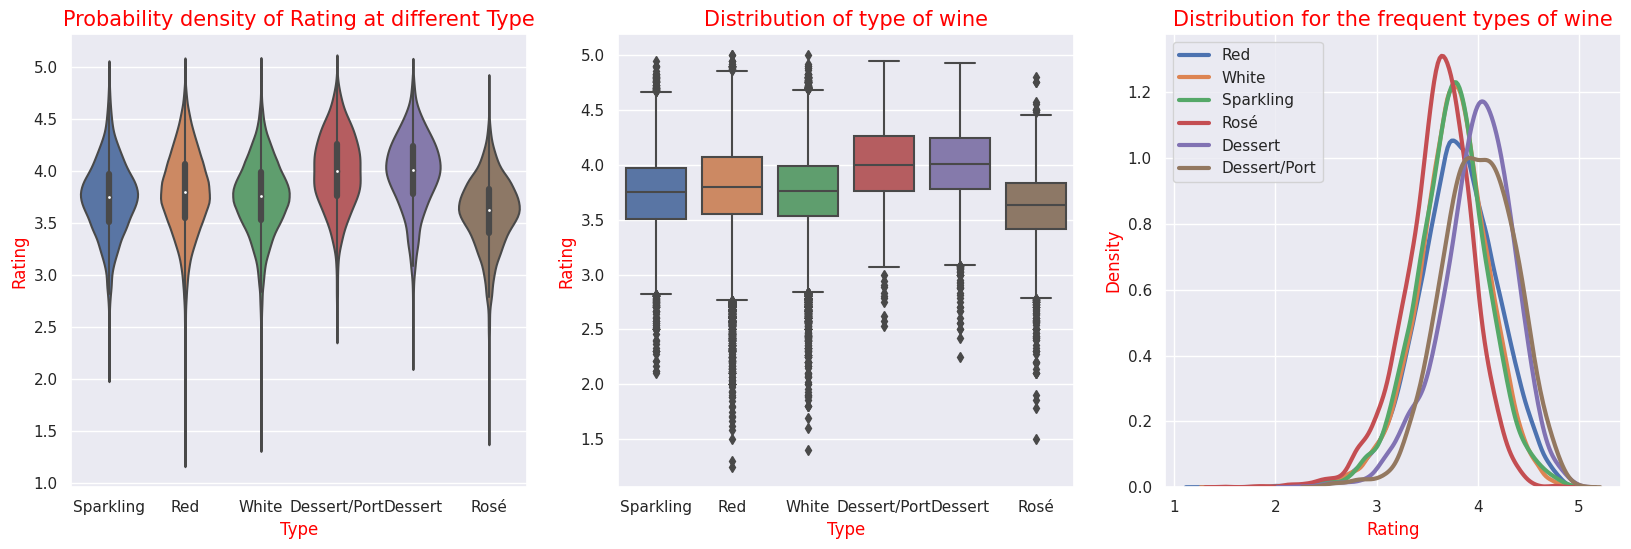

In [ ]:
fig = plt.figure(figsize = ([20,20]))
plt.subplot(3,3,1)
sns.violinplot(x="Type", y="Rating", data=df)
plt.xlabel('Type', color = 'Red', fontsize = 12)
plt.ylabel('Rating', color = 'Red', fontsize = 12)
plt.title('Probability density of Rating at different Type', color = 'Red', fontsize = 15)

plt.subplot(3,3,2)
sns.boxplot(x="Type", y="Rating", data=df)
plt.xlabel('Type', color = 'Red', fontsize = 12)
plt.ylabel('Rating', color = 'Red', fontsize = 12)
plt.title('Distribution of type of wine', color = 'Red', fontsize = 15)

plt.subplot(3,3,3)
freq_type = df['Type'].value_counts().index
plot_distribution(df, "Rating", freq_type, "Type")
plt.title("Distribution for the frequent types of wine", color = 'Red', fontsize = 15)
plt.legend()

plt.show()

1. For the Sparking, Red, White Type, the maximum point density in the range of rating from 3.7 to 3.8.
2. For the Dessert/Port, the maximum point density in the range of rating from 3.8 to 4.3, which is the highest rating among these types.
3. For the Dessert Type, the maximum point density in the range of rating from 3.9 to 4.1.
4. For the Rosé Type, the maximum point density in the range of rating at 3.6, which is the lowest rating among these types.

> There is a weak impact differentiations based on comparing variety of type to rating, except for "Sparking" and "White' Type because it has a little different (other types has unique pattern).



* 'Type' is the feature that hasnot significance with 'Rating' (Target).
* 'Grapes' is the feature that has significance with 'Rating' (Target).

###*5.* What are the top 5 rated wines that are the most & least acidic?

In [ ]:
df['Acidity'].value_counts()

High      79346
Medium    17831
Low        3404
Name: Acidity, dtype: int64

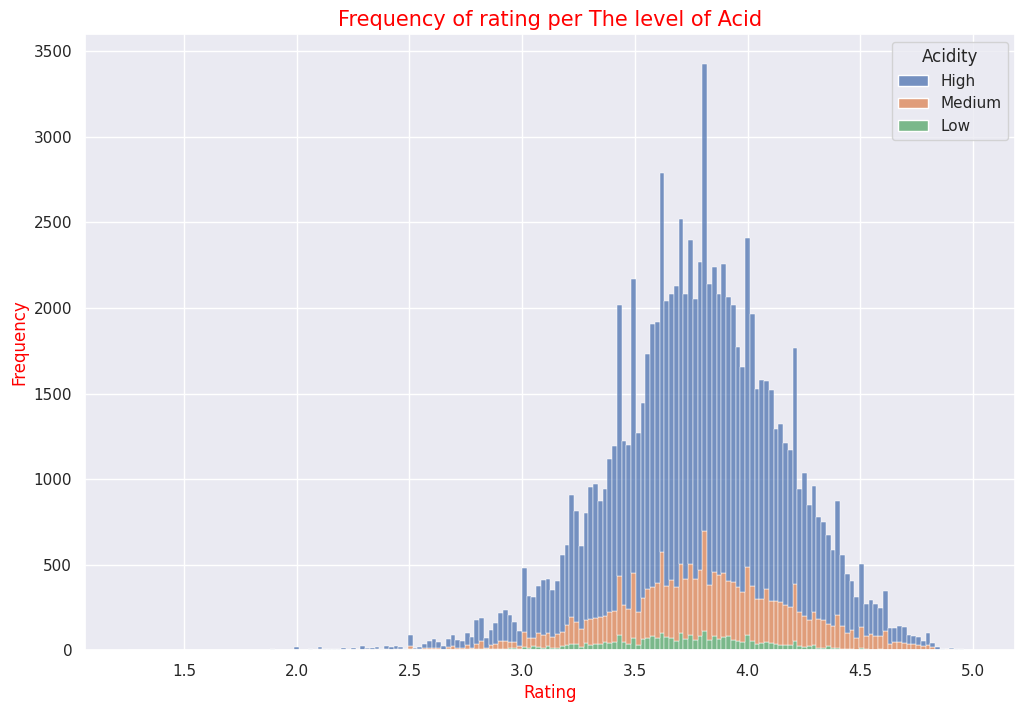

In [ ]:
fig = plt.figure(figsize = ([12,8]))
sns.histplot(data = df, x  = 'Rating', hue = 'Acidity', multiple="stack", legend = True)
plt.title('Frequency of rating per The level of Acid', fontsize = 15, color = 'Red')
plt.xlabel('Rating', color = 'Red', fontsize = 12)
plt.ylabel('Frequency', color = 'Red', fontsize = 12)
plt.show()

###### The top 5 rated wines that are the least acidic.

In [ ]:
df_least_acid = df[(df['Acidity'] == 'Low')][['WineName', 'Rating']]
df_least_acid = df_least_acid.groupby('WineName')['Rating'].mean().sort_values(ascending = False)
df_least_acid

WineName
Don PX Convento Selección                                     4.80
Gold Chardonnay                                               4.79
Estate Finch Hollow Unfiltered Chardonnay (Cave Fermented)    4.77
Vintage Port Nacional                                         4.76
Epokale                                                       4.76
                                                              ... 
Collina del Sole Tinto Seco                                   2.28
Tinto Seco de Mesa                                            2.26
Seco Tinto                                                    2.10
Premium Collection Cabernet-Syrah                             2.10
Cálice de Pedra Isabel-Violeta Tinto Demi-Sec                 2.00
Name: Rating, Length: 2353, dtype: float64

Base on the mean of the rating for each wine (WineName). For example, Vintage Ports has 9 times, if base on the largest rating, it will go wrong. Hence, I will use mean for that 9 times and sort by descending (get the 5 largest mean of rating). In this case, the answer will be true.

In [ ]:
top_5_least_acid = df_least_acid.nlargest(5)
top_5_least_acid = top_5_least_acid.reset_index()
top_5_least_acid

,WineName,Rating
0,Don PX Convento Selección,4.80
1,Gold Chardonnay,4.79
2,Estate Finch Hollow Unfiltered Chardonnay (Cav...,4.77
3,Vintage Port Nacional,4.76
4,Epokale,4.76


###### The top 5 rated wines that are the most acidic.

In [ ]:
df_most_acid = df[(df['Acidity'] == 'High')][['WineName', 'Rating']]
df_most_acid = df_most_acid.groupby('WineName')['Rating'].mean().sort_values(ascending = False)
df_most_acid

WineName
Brigante Crocco Merlot                           5.00
Frattey Shams Anderson Valley Pinot Noir         5.00
Pajarito del Amor                                4.94
Clos d'Ambonnay Blanc de Noirs Brut Champagne    4.94
Jusqu'a l'Os                                     4.94
                                                 ... 
Chai des Terrasses                               1.70
Beiras Jaen                                      1.67
Tempranillo Merlot Syrah                         1.58
Lambrusco Al Ross Dal Sord                       1.50
Muscat Semi Sweet                                1.40
Name: Rating, Length: 48239, dtype: float64

In [ ]:
top_5_most_acid = df_most_acid.nlargest(5)
top_5_most_acid = top_5_most_acid.reset_index()
top_5_most_acid

,WineName,Rating
0,Brigante Crocco Merlot,5.00
1,Frattey Shams Anderson Valley Pinot Noir,5.00
2,Pajarito del Amor,4.94
3,Clos d'Ambonnay Blanc de Noirs Brut Champagne,4.94
4,Jusqu'a l'Os,4.94


###*6.* What are the distinguishing (unique) features, as compared to other wines, of the top rated South African wines?



In [ ]:
df_SA = df[df['Country'] == 'South Africa']
df_other = df[df['Country'] != 'South Africa']

In [ ]:
df_a = df_SA['Rating'].describe()
df_a

count    3218.000000
mean        3.716672
std         0.377268
min         2.000000
25%         3.480000
50%         3.720000
75%         3.960000
max         4.760000
Name: Rating, dtype: float64

In [ ]:
df_b = df_other['Rating'].describe()
df_b

count    97363.000000
mean         3.779007
std          0.389947
min          1.250000
25%          3.540000
50%          3.790000
75%          4.040000
max          5.000000
Name: Rating, dtype: float64

 Choose the rating threshold is 4.0 which Wine has rated larger than 4 is highly rated.

In [ ]:
df_SA_check = df_SA.groupby('WineName')['Rating'].mean().sort_values(ascending = False)
df_SA_check

WineName
Book 17 XVII                                              4.76
Cape Winemakers Guild Auction Reverse Shiraz-Mourvèdre    4.72
Black Label Pinotage                                      4.72
Cape Winemakers Guild Teen Die Hoog Shiraz                4.71
Cape Winemakers Guild Professore                          4.70
                                                          ... 
Sauvignon Blanc Sparkling                                 2.50
Winemaker's Selection Pinotage-Cinsaut                    2.36
Gran Pinotage Rosé                                        2.28
Artie Pinotage Rosé                                       2.10
Zero Sulphur Added Organic Cabernet Sauvignon             2.00
Name: Rating, Length: 2004, dtype: float64

In [ ]:
df_SA_check = df_SA.groupby('WineName')['Rating'].mean().reset_index().sort_values('Rating', ascending = False)
df_SA_check = df_SA_check.rename(columns={"Rating":"Mean-Rating", 'Unnamed: 0': 'Index'})
df_SA_check

,WineName,Mean-Rating
148,Book 17 XVII,4.76
277,Cape Winemakers Guild Auction Reverse Shiraz-M...,4.72
122,Black Label Pinotage,4.72
310,Cape Winemakers Guild Teen Die Hoog Shiraz,4.71
304,Cape Winemakers Guild Professore,4.70
...,...,...
1418,Sauvignon Blanc Sparkling,2.50
1972,Winemaker's Selection Pinotage-Cinsaut,2.36
736,Gran Pinotage Rosé,2.28
67,Artie Pinotage Rosé,2.10


In [ ]:
df_SA_check = df_SA_check[df_SA_check['Mean-Rating'] >= 4.0]
df_SA_check

,WineName,Mean-Rating
148,Book 17 XVII,4.76
277,Cape Winemakers Guild Auction Reverse Shiraz-M...,4.72
122,Black Label Pinotage,4.72
310,Cape Winemakers Guild Teen Die Hoog Shiraz,4.71
304,Cape Winemakers Guild Professore,4.70
...,...,...
1848,Traildust,4.00
1264,Private Collection Syrah,4.00
1161,Perroquet Cape Tawny,4.00
366,Chardonnay Cellarmaster's Release No Added Sul...,4.00


In [ ]:
df_SA_final = pd.merge(df_SA_check, df_SA, left_on = 'WineName', right_on = 'WineName')
df_SA_final = df_SA_final.drop_duplicates('WineName')
df_SA_final

,WineName,Mean-Rating,Unnamed: 0,WineID,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Rating
0,Book 17 XVII,4.76,72055,172162,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Malbec']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",15.5,Full-bodied,High,ZA,South Africa,2619,Stellenbosch,70903,De Toren,4.76
1,Cape Winemakers Guild Auction Reverse Shiraz-M...,4.72,73594,173701,Red,Assemblage/Blend,"['Syrah/Shiraz', 'Mourvedre']","['Beef', 'Lamb', 'Spicy Food', 'Maturated Chee...",14.0,Full-bodied,High,ZA,South Africa,2627,Western Cape,70405,Luddite,4.72
2,Black Label Pinotage,4.72,71620,171727,Red,Varietal/100%,['Pinotage'],"['Beef', 'Game Meat', 'Poultry']",14.5,Full-bodied,High,ZA,South Africa,2619,Stellenbosch,70911,Kanonkop,4.72
3,Cape Winemakers Guild Teen Die Hoog Shiraz,4.71,72907,173014,Red,Varietal/100%,['Syrah/Shiraz'],"['Beef', 'Lamb', 'Game Meat', 'Poultry']",14.5,Very full-bodied,High,ZA,South Africa,2627,Western Cape,70462,Cederberg,4.71
4,Cape Winemakers Guild Professore,4.70,74047,174154,Red,Assemblage/Blend,"['Pinotage', 'Nouvelle', 'Roobernet']","['Game Meat', 'Poultry']",14.2,Full-bodied,High,ZA,South Africa,2627,Western Cape,71569,Bartho Eksteen Wijnskool,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,Traildust,4.00,71947,172054,Red,Assemblage/Blend,"['Pinot Noir', 'Pinotage', 'Cinsault']","['Beef', 'Game Meat', 'Poultry']",15.0,Full-bodied,High,ZA,South Africa,2596,Coastal Region,70556,Beyerskloof,4.00
579,Private Collection Syrah,4.00,71232,171339,Red,Varietal/100%,['Syrah/Shiraz'],"['Beef', 'Lamb', 'Game Meat', 'Poultry']",14.0,Very full-bodied,High,ZA,South Africa,2619,Stellenbosch,71141,Saxenburg,4.00
580,Perroquet Cape Tawny,4.00,73915,174022,Dessert/Port,Varietal/100%,['Tinta Barroca'],"['Beef', 'Pasta', 'Lamb', 'Game Meat']",19.0,Very full-bodied,High,ZA,South Africa,2619,Stellenbosch,70981,Louiesenhof,4.00
581,Chardonnay Cellarmaster's Release No Added Sul...,4.00,73859,173966,White,Varietal/100%,['Chardonnay'],"['Pork', 'Rich Fish', 'Vegetarian', 'Poultry']",11.9,Full-bodied,High,ZA,South Africa,2619,Stellenbosch,71136,Stellenzicht,4.00


In [ ]:
df_other_check = df_other.groupby('WineName')['Rating'].mean().reset_index().sort_values('Rating', ascending = False)
df_other_check = df_other_check.rename(columns={"Rating":"Mean-Rating"})
df_other_check

,WineName,Mean-Rating
20962,Frattey Shams Anderson Valley Pinot Noir,5.00
6541,Brigante Crocco Merlot,5.00
58321,Wraith Cabernet Sauvignon,4.94
37875,Pajarito del Amor,4.94
26104,Jusqu'a l'Os,4.94
...,...,...
51416,Tempranillo Merlot Syrah,1.58
28352,Lambrusco Al Ross Dal Sord,1.50
28754,Laudet Cerasuolo d'Abruzzo,1.50
35404,Muscat Semi Sweet,1.40


In [ ]:
df_other_check = df_other_check[df_other_check['Mean-Rating'] >= 4.0]
df_other_check

,WineName,Mean-Rating
20962,Frattey Shams Anderson Valley Pinot Noir,5.00
6541,Brigante Crocco Merlot,5.00
58321,Wraith Cabernet Sauvignon,4.94
37875,Pajarito del Amor,4.94
26104,Jusqu'a l'Os,4.94
...,...,...
23873,Gypsy Riddle Proprietary Red,4.00
30848,Letter Series 'B' Sauvignon Blanc,4.00
29590,Le Vignole Bianco del Lazio,4.00
26258,Karma Pinot Noir-Chardonnay Brut,4.00


In [ ]:
df_other_final = pd.merge(df_other_check, df_other, left_on = 'WineName', right_on = 'WineName')
df_other_final = df_other_final.drop_duplicates('WineName')
df_other_final

,WineName,Mean-Rating,Unnamed: 0,WineID,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Rating
0,Frattey Shams Anderson Valley Pinot Noir,5.00,91597,191711,Red,Varietal/100%,['Pinot Noir'],"['Beef', 'Veal', 'Game Meat', 'Poultry']",15.0,Medium-bodied,High,US,United States,1855,North Coast,57497,Pinoli Cole,5.00
1,Brigante Crocco Merlot,5.00,55043,155122,Red,Varietal/100%,['Merlot'],"['Beef', 'Pasta', 'Lamb']",13.8,Full-bodied,High,IT,Italy,1520,Basilicata,41349,Cantine Crocco,5.00
2,Wraith Cabernet Sauvignon,4.94,83335,183447,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Game Meat', 'Maturated Chees...",15.5,Very full-bodied,Medium,US,United States,1848,Napa Valley,57025,Hundred Acre,4.94
3,Pajarito del Amor,4.94,90036,190148,Red,Assemblage/Blend,"['Syrah/Shiraz', 'Grenache', 'Viognier', 'Peti...","['Beef', 'Lamb', 'Veal', 'Poultry']",15.9,Full-bodied,High,US,United States,1919,Ventura County,52868,Sine Qua Non,4.94
4,Jusqu'a l'Os,4.94,88301,188413,Red,Varietal/100%,['Grenache'],"['Beef', 'Lamb', 'Veal', 'Poultry']",15.9,Full-bodied,High,US,United States,1768,Central Coast,52868,Sine Qua Non,4.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23645,Gypsy Riddle Proprietary Red,4.00,90585,190697,Red,Assemblage/Rhône Red Blend,"['Syrah/Shiraz', 'Grenache', 'Mourvedre', 'Pet...","['Beef', 'Lamb', 'Veal', 'Poultry']",15.5,Full-bodied,High,US,United States,1848,Napa Valley,57063,Treasure Hunter,4.00
23646,Letter Series 'B' Sauvignon Blanc,4.00,93490,193619,White,Varietal/100%,['Sauvignon Blanc'],"['Shellfish', 'Vegetarian', 'Goat Cheese']",14.0,Light-bodied,High,NZ,New Zealand,2485,Marlborough,69490,Brancott Estate,4.00
23647,Le Vignole Bianco del Lazio,4.00,49651,149703,White,Assemblage/Blend,"['Sauvignon Blanc', 'Malvasia', 'Trebbiano']","['Pasta', 'Vegetarian', 'Appetizer', 'Snack', ...",12.5,Medium-bodied,High,IT,Italy,1619,Lazio,44292,Colle Picchioni,4.00
23648,Karma Pinot Noir-Chardonnay Brut,4.00,92907,193034,Sparkling,Assemblage/Blend,"['Chardonnay', 'Pinot Noir']","['Veal', 'Pork', 'Game Meat', 'Rich Fish', 'Ve...",9.5,Light-bodied,Low,CA,Canada,2197,British Columbia,65726,Salt Spring Vineyards,4.00


Type

Text(0, 0.5, '')

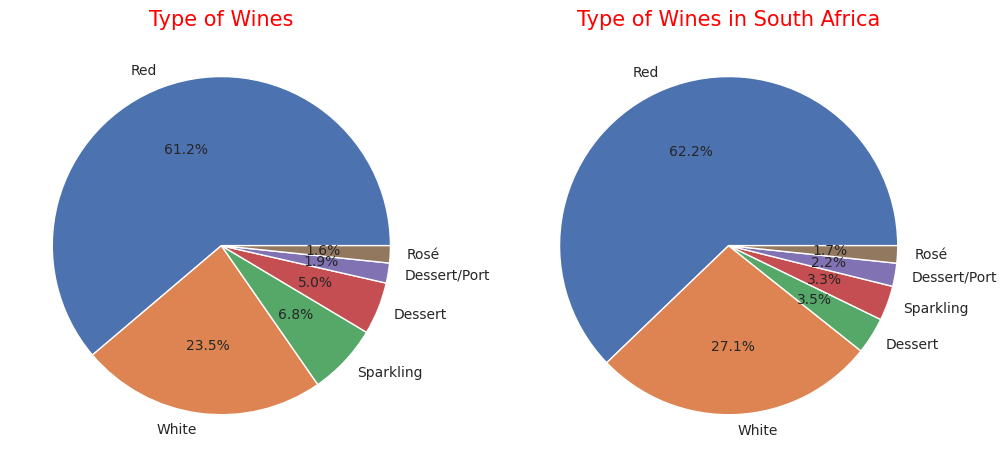

In [ ]:
fig = plt.figure(figsize = ([12,10]))
plt.subplot(1,2,1)
df_other_final['Type'].value_counts().plot.pie(autopct='%1.1f%%', fontsize = 10)
plt.title('Type of Wines', color = 'Red', fontsize = 15)
plt.ylabel('')

plt.subplot(1,2,2)
df_SA_final['Type'].value_counts().plot.pie(autopct='%1.1f%%', fontsize = 10)
plt.title('Type of Wines in South Africa', color = 'Red', fontsize = 15)
plt.ylabel('')


Both 2 datasets have all values in 'Type'.
> 'Type' is not the distinguish features.

Elaborate

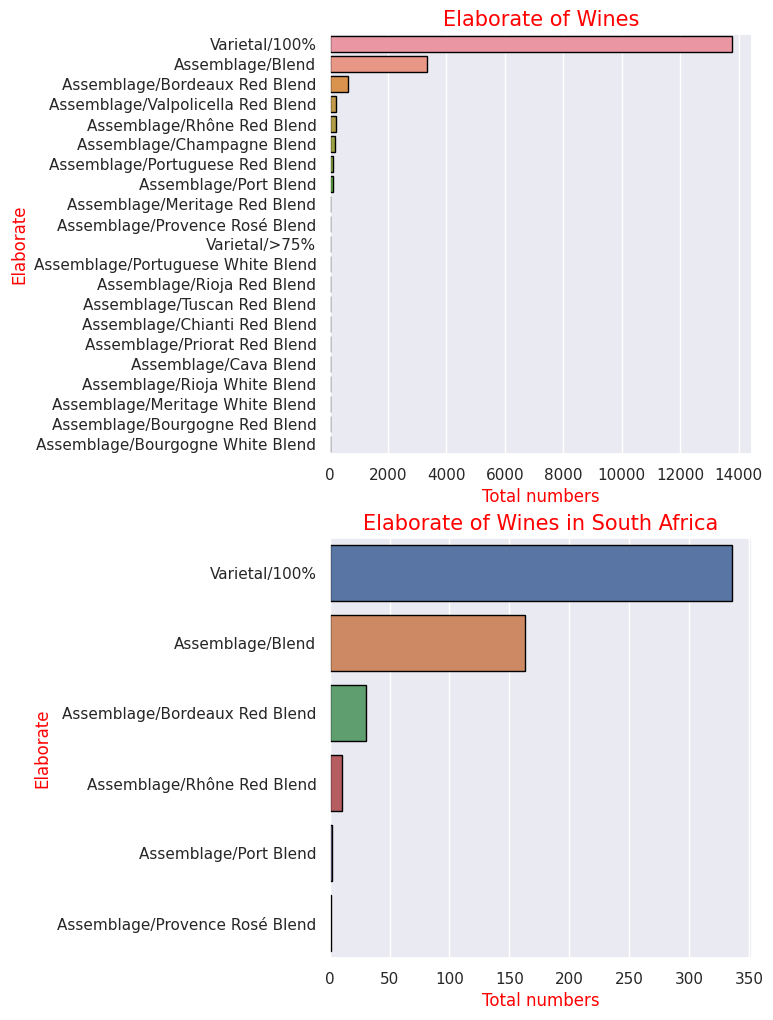

In [ ]:
fig = plt.figure(figsize =([12,12]))
plt.subplot(2,2,1)
sns.countplot(y = 'Elaborate', data = df_other_final, edgecolor = 'black', order = df_other_final['Elaborate'].value_counts().index)
plt.title("Elaborate of Wines", fontsize = 15, color = 'Red')
plt.ylabel("Elaborate", fontsize = 12, color = 'Red')
plt.xlabel("Total numbers", fontsize = 12, color = 'Red')

plt.subplot(2,2,3)
sns.countplot(y = 'Elaborate', data = df_SA_final, edgecolor = 'black', order = df_SA_final['Elaborate'].value_counts().index)
plt.title("Elaborate of Wines in South Africa", fontsize = 15, color = 'Red')
plt.ylabel("Elaborate", fontsize = 12, color = 'Red')
plt.xlabel("Total numbers", fontsize = 12, color = 'Red')
plt.show()

Variety of Elaborate in 'South Africa' also appeared in 'other countries'
> 'Elaborate' is not the distinguishing feature.

Body, Acidity

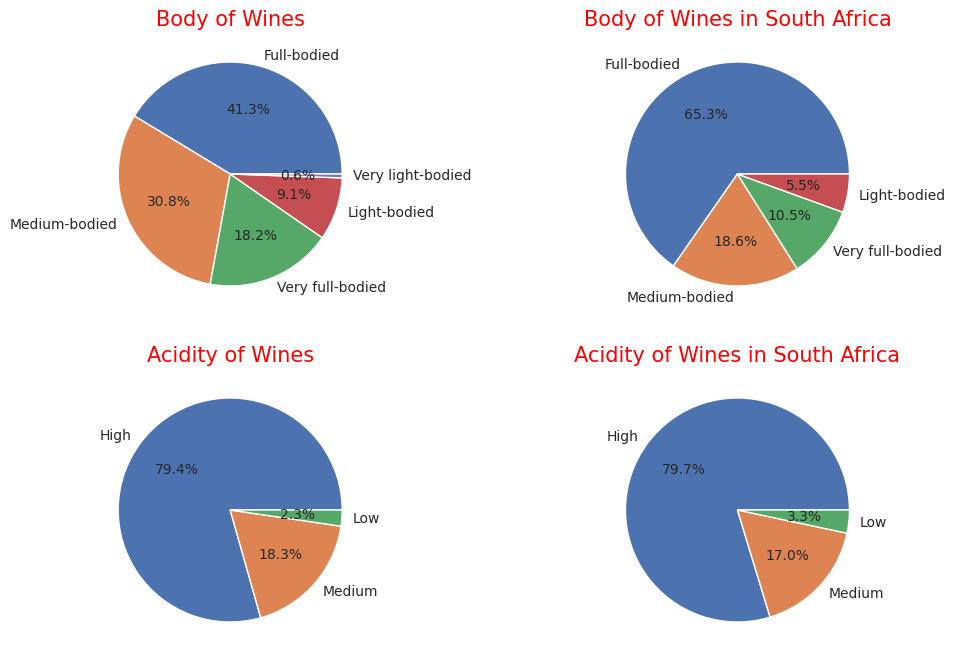

In [ ]:
fig = plt.figure(figsize = ([12,8]))
plt.subplot(2,2,1)
df_other_final['Body'].value_counts().plot.pie(autopct='%1.1f%%', fontsize = 10)
plt.title('Body of Wines', color = 'Red', fontsize = 15)
plt.ylabel('')

plt.subplot(2,2,2)
df_SA_final['Body'].value_counts().plot.pie(autopct='%1.1f%%', fontsize = 10)
plt.title('Body of Wines in South Africa', color = 'Red', fontsize = 15)
plt.ylabel('')


plt.subplot(2,2,3)
df_other_final['Acidity'].value_counts().plot.pie(autopct='%1.1f%%', fontsize = 10)
plt.title('Acidity of Wines', color = 'Red', fontsize = 15)
plt.ylabel('')

plt.subplot(2,2,4)
df_SA_final['Acidity'].value_counts().plot.pie(autopct='%1.1f%%', fontsize = 10)
plt.title('Acidity of Wines in South Africa', color = 'Red', fontsize = 15)
plt.ylabel('')
plt.show()

1. There are a little bit differences in the categorical body classification. 'Very light-bodied' category hasnot appeared in the South Africa while the reverse is true for that of other countries.
2. There is not different in the level of acidity in both datasets.
>'Acidity' and 'Body' are not the distinguishing feature.

RegionName

In [ ]:
# Compare each rows in 2 datasets:
name = df_SA_final['RegionName']
same = 0
non = 0
for name in df_SA_final['RegionName']:
  if name in df_other_final['RegionName'].values:
    same += 1
  else:
    non += 1
print('{} rows that are no same with Other Countries'.format(non))
print('{} rows that are same with Other countries'.format(same))
print('=========================================================================')

same_regions = df_SA_final['RegionName'].isin(df_other_final['RegionName']).values
df_same_region = df_SA_final[same_regions]
df_different_region = df_SA_final[~same_regions] # The rest of df_SA_final[same_regions]

print('The same RegionName between 2 datasets:\n',
      df_same_region['RegionName'].unique())
print('=========================================================================')
print('The different RegionName between 2 datasets:\n',
      df_different_region['RegionName'].unique())

In [ ]:
# Compare each rows in 2 datasets:
name = df_SA_final['RegionName']
same = 0
non = 0
for name in df_SA_final['RegionName']:
  if name in df_other_final['RegionName'].values: #Compare the name of 'RegionName' in 'South Africa' with 'other countries'.
    same += 1
  else:
    non += 1
print('{} rows that are no same with Other Countries'.format(non))
print('{} rows that are same with Other countries'.format(same))
print('=========================================================================')

same_regions = df_SA_final['RegionName'].isin(df_other_final['RegionName']).values # Finding the same values between 2 datasets
df_same_region = df_SA_final[same_regions]
df_different_region = df_SA_final[~same_regions] # The rest of df_SA_final[same_regions]

print('The same RegionName between 2 datasets:\n',
      df_same_region['RegionName'].unique())
print('=========================================================================')
print('The different RegionName between 2 datasets:\n',
      df_different_region['RegionName'].unique())

542 rows that are no same with Other Countries
0 rows that are same with Other countries
The same RegionName between 2 datasets:
 []
The different RegionName between 2 datasets:
 ['Stellenbosch' 'Western Cape' 'Paarl' 'Constantia'
 'Hemel-en-Aarde Valley' 'Tulbagh' 'Swartland' 'Franschhoek' 'Elim'
 'Wellington' 'Durbanville' 'Robertson' 'Piekenierskloof'
 'Breede River Valley' 'Coastal Region' 'Citrusdal Mountain' 'Bot River'
 'Walker Bay' 'Elgin' 'Voor Paardeberg' 'Darling'
 'Simonsberg-Stellenbosch' 'Calitzdorp' 'Ceres' 'Jonkershoek Valley'
 'Cape Point' 'Cape Town' 'Olifants River' 'Cape Agulhas' 'Banghoek'
 'Cape South Coast' 'Overberg' 'Breedekloof']


> 'RegionName' is the distinguishing feature, because there are no similarities between 2 datasets in 'RegionName' feature.

WineryName

In [ ]:
# Compare each rows in 2 datasets:
name = df_SA_final['WineryName']
same = 0
non = 0
for name in df_SA_final['WineryName']:
  if name in df_other_final['WineryName'].values:
    same += 1
  else:
    non += 1
print('{} rows that are no same with Other Countries'.format(non))
print('{} rows that are same with Other countries'.format(same))
print('='*150)

same_wname = df_SA_final['WineryName'].isin(df_other_final['WineryName']).values # Finding the same values between 2 datasets
df_same_wname = df_SA_final[same_wname]
df_different_wname = df_SA_final[~same_wname] # The rest of df_SA_final[same_wname]

print('The same WineryName between 2 datasets:\n',
      df_same_wname['WineryName'].unique())
print('='*150)
print('The different WineryName between 2 datasets:\n',
      df_different_wname['WineryName'].unique())

533 rows that are no same with Other Countries
9 rows that are same with Other countries
The same WineryName between 2 datasets:
 ['Ken Forrester' 'Storm' 'Lidl' 'Xavier Flouret']
The different WineryName between 2 datasets:
 ['De Toren' 'Luddite' 'Kanonkop' 'Cederberg' 'Bartho Eksteen Wijnskool'
 'Glen Carlou' 'Dalla Cia' 'Beyerskloof' 'Klein Constantia'
 'Waterford Estate' 'Asara Wine Estate' 'Shaun Crombé' 'Groot Constantia'
 'Blackwater' 'Mount Babylon' 'Hartenberg' 'Rust En Vrede' 'Jordan Wines'
 'Clouds' 'Spier' 'Neil Ellis' 'The Drift' 'Vriesenhof' "Rijk's"
 'Mullineux' 'Vilafonté' 'Sadie Family' 'Vondeling Wines'
 'Alheit Vineyards' 'Môreson' 'Kleinood' 'Uva Mira Mountain Vineyards'
 'Simonsig' 'Raats' 'Delaire Graff' 'Babylonstoren' 'Boschkloof'
 'Rickety Bridge' 'Avondale' 'David Nieuwoudt' 'Saronsberg' 'Mont Destin'
 'La Motte Wine Estate' 'Delheim' 'Oldenburg Vineyards' 'The High Road'
 'Paul Cluver' 'Bouchard Finlayson' 'Kaapzicht' 'Welgegund' 'Zorgvliet'
 'Flagstone' 'Taa

There are a litle bit of similarities between 2 datasets in 'WineryName' feature, so this is not the unique feature.

Harmonize

In [ ]:
# Compare each rows in 2 datasets:
name = df_SA_final['Harmonize']
same = 0
non = 0
for name in df_SA_final['Harmonize']:
  if name in df_other_final['Harmonize'].values:
    same += 1
  else:
    non += 1
print('{} rows that are no same with Other Countries'.format(non))
print('{} rows that are same with Other Countries'.format(same))
print('='*150)

same_har = df_SA_final['Harmonize'].isin(df_other_final['Harmonize']).values # Finding the same values between 2 datasets
df_same_har = df_SA_final[same_har]
df_different_har = df_SA_final[~same_har] # The rest of df_SA_final[same_har]

print('The same Harmonize between 2 datasets:\n',
      df_same_har['Harmonize'].unique())
print('='*150)
print('The different Harmonize between 2 datasets:\n',
      df_different_har['Harmonize'].unique())

13 rows that are no same with Other Countries
529 rows that are same with Other Countries
The same Harmonize between 2 datasets:
 ["['Beef', 'Lamb', 'Game Meat', 'Poultry']"
 "['Beef', 'Lamb', 'Spicy Food', 'Maturated Cheese', 'Hard Cheese']"
 "['Beef', 'Game Meat', 'Poultry']" "['Game Meat', 'Poultry']"
 "['Pork', 'Rich Fish', 'Vegetarian', 'Poultry']"
 "['Beef', 'Lamb', 'Veal', 'Pork', 'Game Meat', 'Spicy Food', 'Maturated Cheese', 'Hard Cheese', 'Poultry']"
 "['Pasta', 'Vegetarian', 'Poultry', 'Fish', 'Appetizer']"
 "['Beef', 'Lamb', 'Pork', 'Game Meat', 'Spicy Food', 'Maturated Cheese', 'Hard Cheese', 'Poultry', 'Soft Cheese']"
 "['Beef', 'Veal', 'Game Meat', 'Poultry']"
 "['Beef', 'Lamb', 'Pork', 'Game Meat', 'Shellfish', 'Spicy Food', 'Maturated Cheese', 'Hard Cheese', 'Poultry', 'Soft Cheese']"
 "['Beef', 'Lamb', 'Poultry']"
 "['Shellfish', 'Vegetarian', 'Goat Cheese']"
 "['Shellfish', 'Spicy Food', 'Lean Fish', 'Soft Cheese']"
 "['Beef', 'Lamb', 'Spicy Food', 'Poultry']"
 "['Be

There are the big range of the same dishes in Harmonize feature between 2 datasets, so 'Harmonize' is not the distinguish feature.

Grapes

In [ ]:
# Compare each rows in 2 datasets:
name = df_SA_final['Grapes']
same = 0
non = 0
for name in df_SA_final['Grapes']:
  if name in df_other_final['Grapes'].values:
    same += 1
  else:
    non += 1
print('{} rows that are no same with Other Countries'.format(non))
print('{} rows that are same with Other Countries'.format(same))
print('='*150)

# Finding the same values between 2 datasets
same_grape = df_SA_final['Grapes'].isin(df_other_final['Grapes']).values
df_same_grape = df_SA_final[same_grape]
df_different_grape = df_SA_final[~same_grape] # The rest of df_SA_final[same_grape]/not same

print('The same variety of Grapes between 2 datasets:\n',
      df_same_grape['Grapes'].unique())
print('='*150)
print('The different variety of Grapes between 2 datasets:\n',
      df_different_grape['Grapes'].unique())

72 rows that are no same with Other Countries
470 rows that are same with Other Countries
The same variety of Grapes between 2 datasets:
 ["['Cabernet Sauvignon', 'Malbec']" "['Syrah/Shiraz', 'Mourvedre']"
 "['Pinotage']" "['Syrah/Shiraz']" "['Chardonnay']"
 "['Cabernet Sauvignon', 'Merlot', 'Sangiovese']"
 "['Muscat of Frontignan']" "['Pinot Noir']"
 "['Syrah/Shiraz', 'Cabernet Sauvignon']"
 "['Cabernet Sauvignon', 'Cabernet Franc', 'Merlot', 'Petit Verdot']"
 "['Cabernet Sauvignon', 'Cabernet Franc', 'Malbec', 'Merlot', 'Petit Verdot', 'Carmenère']"
 "['Chenin Blanc']" "['Cabernet Sauvignon', 'Cabernet Franc', 'Merlot']"
 "['Cabernet Sauvignon', 'Cabernet Franc']" "['Cabernet Sauvignon']"
 "['Cabernet Franc']"
 "['Cabernet Sauvignon', 'Cabernet Franc', 'Malbec', 'Merlot', 'Petit Verdot']"
 "['Petit Verdot', 'Cabernet Sauvignon', 'Cabernet Franc', 'Malbec', 'Merlot']"
 "['Sémillon']" "['Mourvedre', 'Syrah/Shiraz', 'Grenache']"
 "['Cabernet Sauvignon', 'Cabernet Franc', 'Malbec', 'Merl

There are the big range of the same variety of Grapes  between 2 datasets, so 'Grapes' is not the distinguish feature.

ABV

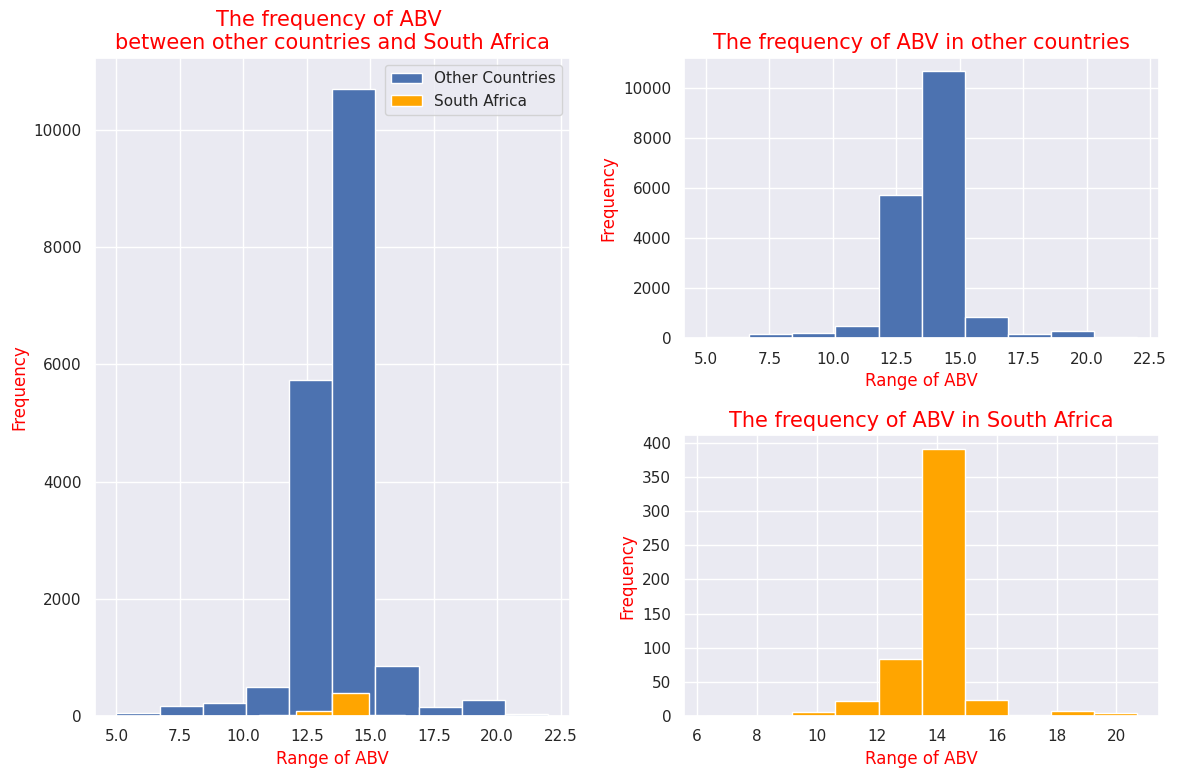

In [ ]:
fig = plt.figure(figsize = ([12,8]))
plt.subplot2grid((2,2),(0,0), colspan = 1, rowspan = 2)
plt.hist(df_other_final['ABV'], label = 'Other Countries')
plt.hist(df_SA_final['ABV'], label = 'South Africa', color = 'Orange')
plt.xlabel('Range of ABV', color = 'Red', fontsize = 12)
plt.ylabel('Frequency', color = 'Red', fontsize = 12)
plt.title('The frequency of ABV \nbetween other countries and South Africa', color = 'Red', fontsize = 15)
plt.legend(loc = 'best')

plt.subplot2grid((2,2),(0,1), rowspan = 1, colspan = 1)
plt.hist(df_other_final['ABV'])
plt.xlabel('Range of ABV', color = 'Red', fontsize = 12)
plt.ylabel('Frequency', color = 'Red', fontsize = 12)
plt.title('The frequency of ABV in other countries', color = 'Red', fontsize = 15)

plt.subplot2grid((2,2),(1,1), rowspan = 1, colspan = 1)
plt.hist(df_SA_final['ABV'], color = 'Orange')
plt.xlabel('Range of ABV', color = 'Red', fontsize = 12)
plt.ylabel('Frequency', color = 'Red', fontsize = 12)
plt.title('The frequency of ABV in South Africa', color = 'Red', fontsize = 15)
plt.tight_layout()
plt.show()


1. Other coutries: the range of ABV is from 5 to 22,5, which is wider than that of South Africa.
2. South Africa: the range of ABV is from 6 to 20, which is smaller than that of other countries.
> ABV is not the unique feature to compare with other wines.

### **CONCLUSION**

1. Which features are most important for predicting ‘Rating’?
 * Visualizing correlation through Heatmap: finding some features that has correlation with Rating (<= -0.05 & >= 0.05)
 * Visualizing distribution through Distribution plot: checking the different shape in each parts (the most, the second most, the least, the second least frequency)
    * Country
    * Code
    * ABV
    * Elaborate

2. Which regions have the highest percentage of highly rated wines (top 5 regions)?
 * Find the threshold of the top of Regions => threshold = 4.03
 * Count the unique regions that meet the requirement (base on threshold)
 * Percentage = (times that regions meet the conditions/total of regions meet the conditions)
 * Find the top 5 regions.
 * Visualize by Barchart, sort by descending.
    * Napa Valley
    * Bourgogne
    * Champagne
    * Douro
    * Mendoza
3. Which countries have  the highest percentage of highly rated wines (top 5 countries)?
 * Find the threshold of the top of Countries => threshold = 4.03
 * Count the unique Country that meet the requirement (base on threshold)
 * Percentage = (times that country meet the conditions/total of Country meet the conditions)
 * Find the top 5 countries.
 * Visualize by Barchart, sort by descending.
    * France
    * United States
    * Italy
    * Portugal
    * Australia

4. Do ‘Type’ and ‘Grapes’ have significance with ‘Rating’?
 * Visualizating by Heatmap to show the correlation.
 * Visualizating by Distribution plot, violin plot, boxplot ('Type').
 * Use Kruskal-Wallis ('Grapes')
    * 'Type' has not significance with 'Rating'.
    * 'Grapes' has significane with 'Rating'.

5. What are the top 5 rated wines that are the most & least acidic?
 * The top 5 rated wines that are the most acidic:
    * Group the 'WineName' and 'Rating'.
    * Find the top 5 WineName that have the top mean base on the condition (Acidity = 'High')
    * Visualizating by barchart.
       * Frattey Shams Anderson Valley Pinot Noir
       * Brigante Crocco Merlot
       * Clos d'Ambonnay Blanc de Noirs Brut Champagne
       * Jusqu'a l'Os
       * Pajarito del Amor
 * The top 5 rated wines that are the least acidic:
    * Group the 'WineName' and 'Rating'.
    * Find the top 5 WineName that have the top mean base on the condition (Acidity = 'Low')
    * Visualizating by barchart.
       * Don PX Convento Selección
       * Gold Chardonnay
       * Estate Finch Hollow Unfiltered Chardonnay (Cav...)
       * Vintage Port Nacional
       * Epokale


6. What are the distinguishing (unique) features, as compared to other wines, of the top rated South African wines?
 * Divide the dataset into 2 parts:
    * 1 dataset that 'Country' = 'South Africa'.
    * 1 dataset that 'Country' != 'South Africa'.
 * Find the threshold of top rated wine in South Africa. (Rating >= 4.0).
 * Compare each feature in the 2 datasets. Which feature has significant difference that on the other dataset doesn't have -> Unique feature.
 * The unique features:
    * Code (The code of Country)
    * RegionName
    * RegionID
